In [481]:
#Basic Modules
import pandas as pd
import numpy as np
#plots
import seaborn as sns
import plotly.graph_objects as go
#Data Handling
from sklearn.preprocessing import (Normalizer,StandardScaler,MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder

# Genetic Modules
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestClassifier
from matplotlib import rcParams
from cycler import cycler
#Log Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score,
                             f1_score,balanced_accuracy_score)
#Naive Bayes
from sklearn.naive_bayes import GaussianNB, CategoricalNB
# metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay,r2_score
# Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt

import pickle 

In [2]:
route = 'C:/Users/Emilio/Desktop/TOG Exp/Datasets/'
# data = pd.read_parquet(route+'ohlcV.parquet')
# data = pd.read_parquet(route+'ohlc-2017.parquet')
data = pd.read_parquet(route + 'ohlc-2021.parquet')
#data = pd.read_parquet(route + 'ohlc1.parquet')
data = data.drop(['drop', 'close_time'], axis=1)
data.head()

open      high       low     close     volume  \
timestamp                                                                
2021-01-01 00:00:00  28923.63  28961.66  28913.12  28961.66  27.457032   
2021-01-01 00:01:00  28961.67  29017.50  28961.01  29009.91  58.477501   
2021-01-01 00:02:00  29009.54  29016.71  28973.58  28989.30  42.470329   
2021-01-01 00:03:00  28989.68  28999.85  28972.33  28982.69  30.360677   
2021-01-01 00:04:00  28982.67  28995.93  28971.80  28975.65  24.124339   

                     quote_asset_volume  trades  buy_asset_volume  \
timestamp                                                           
2021-01-01 00:00:00        7.943820e+05    1292         16.777195   
2021-01-01 00:01:00        1.695803e+06    1651         33.733818   
2021-01-01 00:02:00        1.231359e+06     986         13.247444   
2021-01-01 00:03:00        8.800168e+05     959          9.456028   
2021-01-01 00:04:00        6.992262e+05     726          6.814644   

                     taker_buy_asset_volume  
timestamp                                    
2021-01-01 00:00:00           485390.826825  
2021-01-01 00:01:00           978176.468202  
2021-01-01 00:02:00           384076.854453  
2021-01-01 00:03:00           274083.075142  
2021-01-01 00:04:00           197519.374888

In [295]:
print(data.shape)
print(data.isnull().sum())

(962367, 9)
open                      0
high                      0
low                       0
close                     0
volume                    0
quote_asset_volume        0
trades                    0
buy_asset_volume          0
taker_buy_asset_volume    0
dtype: int64


In [4]:
# %% Quick description of the data
desc = data.describe()
info = data.info()
print(desc, info)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 962367 entries, 2021-01-01 00:00:00 to 2022-10-31 23:59:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   open                    962367 non-null  float64
 1   high                    962367 non-null  float64
 2   low                     962367 non-null  float64
 3   close                   962367 non-null  float64
 4   volume                  962367 non-null  float64
 5   quote_asset_volume      962367 non-null  float64
 6   trades                  962367 non-null  int64  
 7   buy_asset_volume        962367 non-null  float64
 8   taker_buy_asset_volume  962367 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 73.4 MB
                open           high            low          close  \
count  962367.000000  962367.000000  962367.000000  962367.000000   
mean    39651.462393   39678.499365   39624.563856   39651.451460   
std 

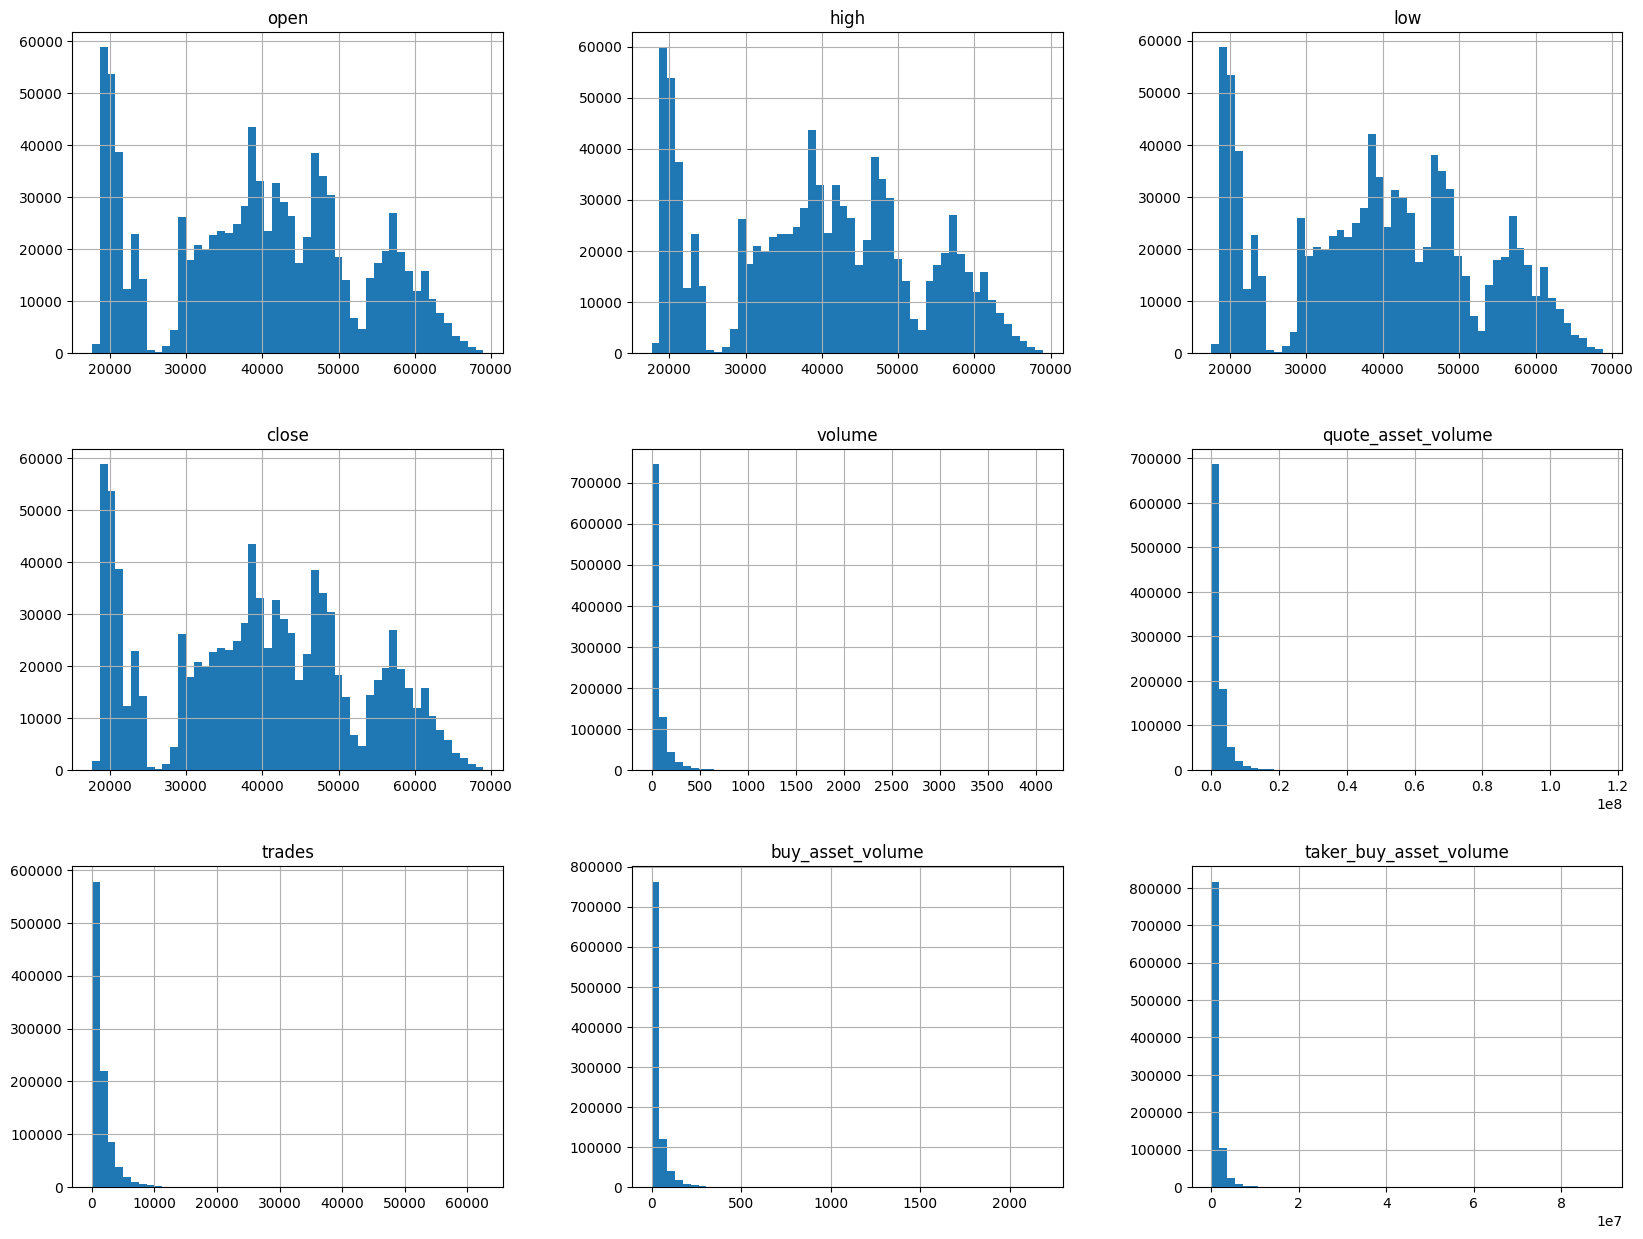

<AxesSubplot:xlabel='timestamp'>

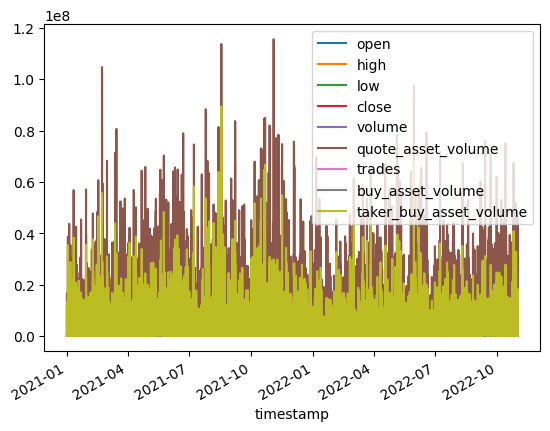

In [5]:
# %matplotlib inline
data.hist(bins=50, figsize=(20, 15))
plt.show()

data.plot()

In [6]:
# %% Resampling
rs = '4H'
data1 = data.copy()
data1['open'] = data1['open'].resample(rs).first()
data1['high'] = data1['high'].resample(rs).max()
data1['low'] = data1['low'].resample(rs).min()
data1['close'] = data1['close'].resample(rs).last()
data1['volume'] = data1['volume'].resample(rs).sum()
data1['quote_asset_volume'] = data1['quote_asset_volume'].resample(rs).sum()
data1['trades'] = data1['trades'].resample(rs).sum()
data1['buy_asset_volume'] = data1['buy_asset_volume'].resample(rs).sum()
data1['taker_buy_asset_volume'] = data1['taker_buy_asset_volume'].resample(rs).sum()
data1 = data1.resample(rs).sum()
print(data1.shape)
data1.head()


(4014, 9)


open      high       low     close        volume  \
timestamp                                                                   
2021-01-01 00:00:00  28923.63  29470.00  28690.17  29278.40  11560.456553   
2021-01-01 04:00:00  29278.41  29395.00  28806.54  29092.83   7308.910274   
2021-01-01 08:00:00  29092.84  29402.57  28872.24  29313.49   8283.705319   
2021-01-01 12:00:00  29313.49  29600.00  29030.14  29188.67  11794.949515   
2021-01-01 16:00:00  29188.67  29360.00  28624.57  29029.04   9850.965345   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-01 00:00:00        3.377301e+08  262441.0       6354.750111   
2021-01-01 04:00:00        2.129598e+08  196772.0       3437.053243   
2021-01-01 08:00:00        2.418435e+08  195352.0       4554.094883   
2021-01-01 12:00:00        3.462628e+08  269572.0       5950.099715   
2021-01-01 16:00:00        2.864391e+08  237490.0       4347.017575   

                     taker_buy_asset_volume  
timestamp                                    
2021-01-01 00:00:00            1.856758e+08  
2021-01-01 04:00:00            1.001704e+08  
2021-01-01 08:00:00            1.329897e+08  
2021-01-01 12:00:00            1.747701e+08  
2021-01-01 16:00:00            1.264574e+08

In [7]:
# %% Feature Engineering

ohlcv = data1.copy()
# OHLC Chart
fig = go.Figure(data=go.Ohlc(x=ohlcv.index,
                             open=ohlcv['open'],
                             high=ohlcv['high'],
                             low=ohlcv['low'],
                             close=ohlcv['close']))

fig.show()


In [8]:
# Volatility
volatility = []
for i in range(len(ohlcv)):
    vol = ohlcv['high'][i] - ohlcv['low'][i]
    volatility.append(vol)
ohlcv['volatility'] = volatility

# micro trends
high_open = []
for i in range(len(ohlcv)):
    ho = ohlcv['high'][i] - ohlcv['open'][i]
    high_open.append(ho)
ohlcv['high_open'] = high_open

open_low = []
for i in range(len(ohlcv)):
    ol = ohlcv['open'][i] - ohlcv['low'][i]
    open_low.append(ol)
ohlcv['open_low'] = open_low

close_open = []
for i in range(len(ohlcv)):
    co = ohlcv['close'][i] - ohlcv['open'][i]
    close_open.append(co)
ohlcv['close_open'] = close_open
ohlcv.head()

ohlcv2 = ohlcv.copy()
ohlcv2.head()

open      high       low     close        volume  \
timestamp                                                                   
2021-01-01 00:00:00  28923.63  29470.00  28690.17  29278.40  11560.456553   
2021-01-01 04:00:00  29278.41  29395.00  28806.54  29092.83   7308.910274   
2021-01-01 08:00:00  29092.84  29402.57  28872.24  29313.49   8283.705319   
2021-01-01 12:00:00  29313.49  29600.00  29030.14  29188.67  11794.949515   
2021-01-01 16:00:00  29188.67  29360.00  28624.57  29029.04   9850.965345   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-01 00:00:00        3.377301e+08  262441.0       6354.750111   
2021-01-01 04:00:00        2.129598e+08  196772.0       3437.053243   
2021-01-01 08:00:00        2.418435e+08  195352.0       4554.094883   
2021-01-01 12:00:00        3.462628e+08  269572.0       5950.099715   
2021-01-01 16:00:00        2.864391e+08  237490.0       4347.017575   

                     taker_buy_asset_volume  volatility  high_open  open_low  \
timestamp                                                                      
2021-01-01 00:00:00            1.856758e+08      779.83     546.37    233.46   
2021-01-01 04:00:00            1.001704e+08      588.46     116.59    471.87   
2021-01-01 08:00:00            1.329897e+08      530.33     309.73    220.60   
2021-01-01 12:00:00            1.747701e+08      569.86     286.51    283.35   
2021-01-01 16:00:00            1.264574e+08      735.43     171.33    564.10   

                     close_open  
timestamp                        
2021-01-01 00:00:00      354.77  
2021-01-01 04:00:00     -185.58  
2021-01-01 08:00:00      220.65  
2021-01-01 12:00:00     -124.82  
2021-01-01 16:00:00     -159.63

In [9]:
# %% Rolling stats
ohlcv2 = ohlcv2.drop(['quote_asset_volume', 'buy_asset_volume', 'taker_buy_asset_volume', 'trades'], axis=1)

def autoregressive_features(p_data, p_memory):
    """
    Creacion de variables de naturaleza autoregresiva (resagos, promedios, diferencias)
    Parameters
    ----------
    p_data: pd.DataFrame
        with OHLCV columns: Open, High, Low, Close, Volume
    p_memory: int
        A value that represents the implicit assumption of a "memory" effect in the prices
    Returns
    -------
    r_features: pd.DataFrame

    """

    # work with a separate copy of original data
    data = ohlcv2.copy()

    # nth-period final price "movement"
    data['co'] = (data['close'] - data['open'])
    # nth-period uptrend movement
    data['ho'] = (data['high'] - data['open'])
    # nth-period downtrend movement
    data['ol'] = (data['open'] - data['low'])
    # nth-period volatility measure
    data['hl'] = (data['high'] - data['low'])

    # N features with window-based calculations
    for n in range(0, p_memory):
        data['ma_ol'] = data['ol'].rolling(n + 2).mean()
        data['ma_ho'] = data['ho'].rolling(n + 2).mean()
        data['ma_hl'] = data['hl'].rolling(n + 2).mean()

        data['lag_ol_' + str(n + 1)] = data['ol'].shift(n + 1)
        data['lag_ho_' + str(n + 1)] = data['ho'].shift(n + 1)
        data['lag_hl_' + str(n + 1)] = data['hl'].shift(n + 1)

        data['sd_ol_' + str(n + 1)] = data['ol'].rolling(n + 1).std()
        data['sd_ho_' + str(n + 1)] = data['ho'].rolling(n + 1).std()
        data['sd_hl_' + str(n + 1)] = data['hl'].rolling(n + 1).std()

        data['lag_vol_' + str(n + 1)] = data['volume'].shift(n + 1)
        data['sum_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).sum()
        data['mean_vol_' + str(n + 1)] = data['volume'].rolling(n + 1).mean()

    # timestamp as index
    data.index = pd.to_datetime(data.index)
    # select columns, drop for NAs, change column types, reset index
    r_features = data.drop(['open', 'high', 'low', 'close', 'hl', 'ol', 'ho', 'volume'], axis=1)
    r_features = r_features.dropna(axis='columns', how='all')
    # r_features = r_features.dropna(axis='rows')
    r_features.iloc[:, 1:] = r_features.iloc[:, 1:].astype(float)
    r_features.reset_index(inplace=True, drop=True)

    return r_features

In [10]:
p_memory = 24
data_ar = autoregressive_features(p_data=ohlcv2, p_memory=p_memory)
data_ar.index = ohlcv2.index

C:\Users\Emilio\AppData\Local\Temp\ipykernel_25924\3380875049.py:39: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_25924\3380875049.py:41: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Emilio\AppData\Local\Temp\ipykernel_25924\3380875049.py:42: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [11]:
ohlcv = pd.merge(ohlcv, data_ar, on='timestamp')
ohlcv = ohlcv.dropna(axis='rows')
ohlcv

open      high       low     close        volume  \
timestamp                                                                   
2021-01-05 00:00:00  31989.75  32853.38  31130.86  31200.00  20813.078600   
2021-01-05 04:00:00  31190.04  31538.45  29900.00  30817.77  23019.057178   
2021-01-05 08:00:00  30817.78  31821.94  30817.78  31776.66  13255.601100   
2021-01-05 12:00:00  31776.66  32375.07  31111.78  32099.98  16243.276369   
2021-01-05 16:00:00  32099.97  34187.09  31763.23  33697.75  23832.165758   
...                       ...       ...       ...       ...           ...   
2022-10-31 04:00:00  20516.07  20593.00  20455.00  20546.65  29471.835350   
2022-10-31 08:00:00  20547.08  20845.92  20449.86  20730.54  56721.149140   
2022-10-31 12:00:00  20731.53  20755.73  20237.95  20401.53  91762.353970   
2022-10-31 16:00:00  20402.60  20533.00  20328.68  20371.72  56560.557890   
2022-10-31 20:00:00  20371.40  20524.76  20353.77  20490.74  30213.829900   

                     quote_asset_volume     trades  buy_asset_volume  \
timestamp                                                              
2021-01-05 00:00:00        6.723706e+08   388923.0      11188.615029   
2021-01-05 04:00:00        7.094205e+08   516921.0      10754.628892   
2021-01-05 08:00:00        4.163708e+08   334534.0       7003.038911   
2021-01-05 12:00:00        5.169420e+08   394782.0       8773.504812   
2021-01-05 16:00:00        7.883068e+08   506591.0      12682.248709   
...                                 ...        ...               ...   
2022-10-31 04:00:00        6.049173e+08   776920.0      14781.076970   
2022-10-31 08:00:00        1.172480e+09  1238636.0      28592.186710   
2022-10-31 12:00:00        1.879868e+09  1815187.0      44932.223450   
2022-10-31 16:00:00        1.154280e+09  1120222.0      28310.843690   
2022-10-31 20:00:00        6.175576e+08   697784.0      15261.786320   

                     taker_buy_asset_volume  volatility_x  ...   mean_vol_23  \
timestamp                                                  ...                 
2021-01-05 00:00:00            3.616540e+08       1722.52  ...  19477.302721   
2021-01-05 04:00:00            3.313609e+08       1638.45  ...  20117.970193   
2021-01-05 08:00:00            2.200195e+08       1004.16  ...  20181.476784   
2021-01-05 12:00:00            2.792921e+08       1263.29  ...  20459.403350   
2021-01-05 16:00:00            4.197817e+08       2423.86  ...  21261.500209   
...                                     ...           ...  ...           ...   
2022-10-31 04:00:00            3.033943e+08        138.00  ...  43431.097281   
2022-10-31 08:00:00            5.910287e+08        396.06  ...  41917.953688   
2022-10-31 12:00:00            9.205263e+08        517.78  ...  44206.169949   
2022-10-31 16:00:00            5.777995e+08        204.32  ...  43829.179064   
2022-10-31 20:00:00            3.119577e+08        170.99  ...  43334.187242   

                     lag_ol_24  lag_ho_24  lag_hl_24    sd_ol_24    sd_ho_24  \
timestamp                                                                      
2021-01-05 00:00:00     233.46     546.37     779.83  952.492608  626.894808   
2021-01-05 04:00:00     471.87     116.59     588.46  954.562728  620.891516   
2021-01-05 08:00:00     220.60     309.73     530.33  961.845906  622.520710   
2021-01-05 12:00:00     283.35     286.51     569.86  955.492915  618.106849   
2021-01-05 16:00:00     564.10     171.33     735.43  959.561062  674.609491   
...                        ...        ...        ...         ...         ...   
2022-10-31 04:00:00      75.18     116.31     191.49   93.156055  109.217597   
2022-10-31 08:00:00     259.41      39.78     299.19   89.735230  114.092706   
2022-10-31 12:00:00     192.11     157.89     350.00  115.984340  115.739121   
2022-10-31 16:00:00      66.46     115.43     181.89  115.779732  115.749206   
2022-10-31 20:00:00     429.59       8.31     437.90  101.123038  113.347674   

    

In [12]:
# Target 
# %% Target Engineering y_hat:CO_{t}
treshold = 100

ohlc = pd.DataFrame(ohlcv)

y_hat = []

for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    y_hat.append(y_hat1)
for i in range(len(ohlc)):
    if y_hat[i] < -treshold:
        y_hat[i] = -2
    elif -treshold <= y_hat[i] < 0:
        y_hat[i] = -1
    elif y_hat[i] == 0:
        y_hat[i] = -1
    elif 0 < y_hat[i] <= treshold:
        y_hat[i] = 1
    else:
        y_hat[i] = 2
# cambiar y_hat por y_hat
ohlc['y_hat'] = y_hat
y_hat_test = y_hat
ohlc.head()

open      high       low     close        volume  \
timestamp                                                                   
2021-01-05 00:00:00  31989.75  32853.38  31130.86  31200.00  20813.078600   
2021-01-05 04:00:00  31190.04  31538.45  29900.00  30817.77  23019.057178   
2021-01-05 08:00:00  30817.78  31821.94  30817.78  31776.66  13255.601100   
2021-01-05 12:00:00  31776.66  32375.07  31111.78  32099.98  16243.276369   
2021-01-05 16:00:00  32099.97  34187.09  31763.23  33697.75  23832.165758   

                     quote_asset_volume    trades  buy_asset_volume  \
timestamp                                                             
2021-01-05 00:00:00        6.723706e+08  388923.0      11188.615029   
2021-01-05 04:00:00        7.094205e+08  516921.0      10754.628892   
2021-01-05 08:00:00        4.163708e+08  334534.0       7003.038911   
2021-01-05 12:00:00        5.169420e+08  394782.0       8773.504812   
2021-01-05 16:00:00        7.883068e+08  506591.0      12682.248709   

                     taker_buy_asset_volume  volatility_x  ...  lag_ol_24  \
timestamp                                                  ...              
2021-01-05 00:00:00            3.616540e+08       1722.52  ...     233.46   
2021-01-05 04:00:00            3.313609e+08       1638.45  ...     471.87   
2021-01-05 08:00:00            2.200195e+08       1004.16  ...     220.60   
2021-01-05 12:00:00            2.792921e+08       1263.29  ...     283.35   
2021-01-05 16:00:00            4.197817e+08       2423.86  ...     564.10   

                     lag_ho_24  lag_hl_24    sd_ol_24    sd_ho_24    sd_hl_24  \
timestamp                                                                       
2021-01-05 00:00:00     546.37     779.83  952.492608  626.894808  922.328352   
2021-01-05 04:00:00     116.59     588.46  954.562728  620.891516  906.547049   
2021-01-05 08:00:00     309.73     530.33  961.845906  622.520710  890.634700   
2021-01-05 12:00:00     286.51     569.86  955.492915  618.106849  871.158499   
2021-01-05 16:00:00     171.33     735.43  959.561062  674.609491  874.891346   

                       lag_vol_24     sum_vol_24   mean_vol_24  y_hat  
timestamp                                                              
2021-01-05 00:00:00  11560.456553  455286.872860  18970.286369     -2  
2021-01-05 04:00:00   7308.910274  470997.019764  19624.875824     -2  
2021-01-05 08:00:00   8283.705319  475968.915545  19832.038148      2  
2021-01-05 12:00:00  11794.949515  480417.242399  20017.385100      2  
2021-01-05 16:00:00   9850.965345  494398.442812  20599.935117      2  

[5 rows x 235 columns]

In [13]:
ohlc['y_hat'] = y_hat
ohlc['y_hat'] = ohlc['y_hat'].shift(-1)
# ohlc.dropna(inplace = True, axis=0)
ohlc.head()
ohlc['y_hat'].value_counts()


 2.0    1530
-2.0    1500
-1.0     485
 1.0     474
Name: y_hat, dtype: int64

In [14]:
mart = []
# cambiar threshold a variables, en vez de hardcode que defina las clases y puede ser asimetrica.
for i in range(len(ohlc)):
    y_hat1 = ohlc["close"][i] - ohlc["open"][i]
    mart.append(y_hat1)
for i in range(len(ohlc)):
    if mart[i] < -treshold:
        mart[i] = -2
    elif -treshold <= mart[i] < 0:
        mart[i] = -1
    elif mart[i] == 0:
        mart[i] = -1
    elif 0 < mart[i] <= treshold:
        mart[i] = 1
    else:
        mart[i] = 2


In [15]:
# Martingale

ohlc['martingale'] = mart
ohlc['martingale'] = ohlc['martingale'].shift(+1)
ohlc = ohlc.fillna(-1)
ohlc2 = pd.DataFrame(ohlc)
ohlc2.to_csv('C:/Users/Emilio/Desktop/Thesis/ohlc2.csv')
ohlc2['martingale'].value_counts()


 2.0    1529
-2.0    1501
-1.0     486
 1.0     474
Name: martingale, dtype: int64

In [16]:
print(ohlc['y_hat'].describe())

count    3990.000000
mean        0.012030
std         1.810766
min        -2.000000
25%        -2.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: y_hat, dtype: float64


In [17]:
accuracy_martingala = accuracy_score(y_hat_test, ohlc2['martingale']) * 100
recall_martingala = recall_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
precision_martingala = precision_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
f1_martingala = f1_score(y_hat_test, ohlc2['martingale'], average='weighted') * 100
balanced_martingala = balanced_accuracy_score(y_hat_test, ohlc2['martingale']) * 100

print('Accuracy:', accuracy_martingala, '%')
print('Recall:', recall_martingala, '%')
print('Precision:', precision_martingala, '%')
print('F1:', f1_martingala, '%')
print('Balanced Accuracy:', balanced_martingala, '%')


Accuracy: 31.32832080200501 %
Recall: 31.32832080200501 %
Precision: 31.331823025415517 %
F1: 31.330067667963796 %
Balanced Accuracy: 27.126043500591052 %


In [18]:
confusion_mart = confusion_matrix(ohlc2['y_hat'], ohlc2['martingale'])
print(confusion_mart)

[[576 173 172 579]
 [155  87  77 167]
 [156  73  73 172]
 [614 153 152 611]]


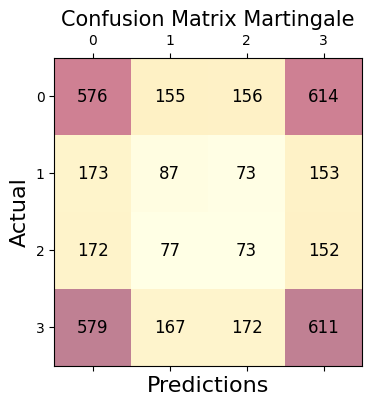

In [19]:
fig, px = plt.subplots(figsize=(4, 4))
px.matshow(confusion_mart, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mart.shape[0]):
    for n in range(confusion_mart.shape[1]):
        px.text(x=m, y=n, s=confusion_mart[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Martingale', fontsize=15)
plt.show()

<AxesSubplot:>

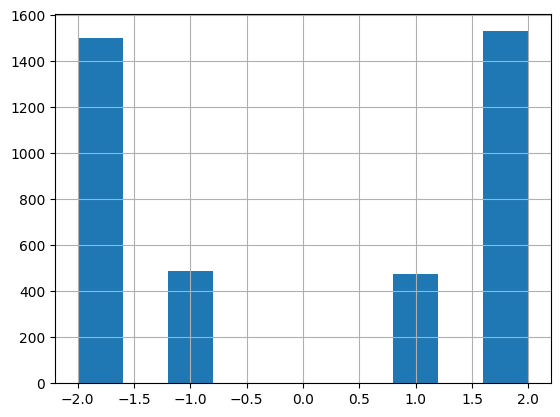

In [20]:
ohlc2['y_hat'].hist()


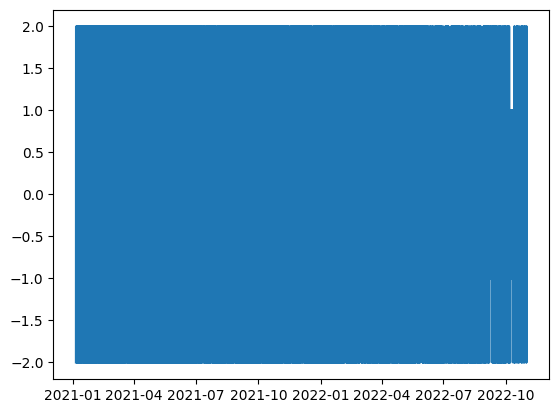

In [21]:
plt.plot(ohlc2['y_hat'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18000d97be0>,
 'caps': [<matplotlib.lines.Line2D at 0x18000d781c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18000d97910>],
 'medians': [<matplotlib.lines.Line2D at 0x18000d78760>],
 'fliers': [<matplotlib.lines.Line2D at 0x18000d78a30>],
 'means': []}

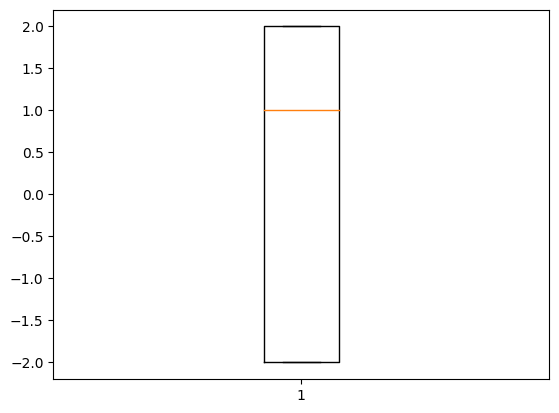

In [22]:
plt.boxplot(ohlc2['y_hat'], notch=None, vert=None, patch_artist=None, widths=None)

In [23]:
corr_y = ohlc2.corrwith(ohlc2['y_hat']).abs()
corr_y

open           0.001986
high           0.002886
low            0.004058
close          0.005890
volume         0.006339
                 ...   
lag_vol_24     0.031914
sum_vol_24     0.011063
mean_vol_24    0.011063
y_hat          1.000000
martingale     0.000499
Length: 236, dtype: float64

In [24]:
X = ohlc2.iloc[:, :-2]
X.head()
y = ohlc2['y_hat'].copy()
y_true = y.copy()
y.head()

timestamp
2021-01-05 00:00:00   -2.0
2021-01-05 04:00:00    2.0
2021-01-05 08:00:00    2.0
2021-01-05 12:00:00    2.0
2021-01-05 16:00:00    2.0
Name: y_hat, dtype: float64

                 open      high       low     close    volume  \
open         1.000000  0.999366  0.998940  0.998645 -0.525291   
high         0.999366  1.000000  0.998638  0.999323 -0.519734   
low          0.998940  0.998638  1.000000  0.999208 -0.536239   
close        0.998645  0.999323  0.999208  1.000000 -0.526918   
volume      -0.525291 -0.519734 -0.536239 -0.526918  1.000000   
...               ...       ...       ...       ...       ...   
sd_ho_24     0.545208  0.554449  0.538604  0.548533 -0.255992   
sd_hl_24     0.446727  0.454202  0.433517  0.445003 -0.160004   
lag_vol_24  -0.521247 -0.520957 -0.522709 -0.521652  0.598870   
sum_vol_24  -0.659454 -0.658307 -0.661441 -0.659361  0.762978   
mean_vol_24 -0.659454 -0.658307 -0.661441 -0.659361  0.762978   

             quote_asset_volume    trades  buy_asset_volume  \
open                  -0.163802 -0.471007         -0.527803   
high                  -0.152806 -0.466092         -0.521611   
low                   -0.18478

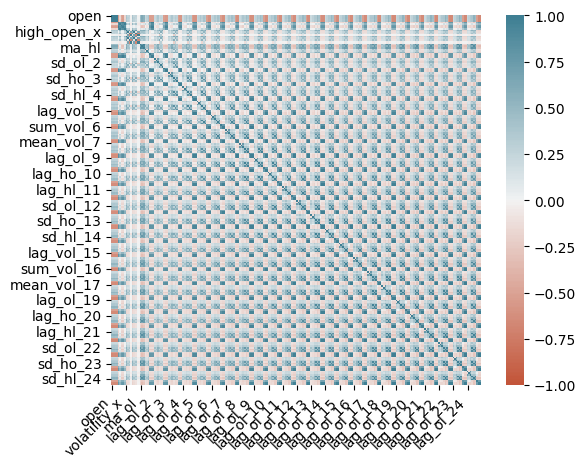

In [25]:
# %% Heatmaps
# Heat map
correlation = X.corr()
print(correlation)

heat = sns.heatmap(
    correlation,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
heat.set_xticklabels(
    heat.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

             open  high  low  close    volume  quote_asset_volume    trades  \
open          1.0   0.6 -0.6   -0.8       NaN                 NaN       NaN   
high          0.6   1.0 -1.0    0.0       NaN                 NaN       NaN   
low          -0.6  -1.0  1.0    0.0       NaN                 NaN       NaN   
close        -0.8   0.0  0.0    1.0       NaN                 NaN       NaN   
volume        NaN   NaN  NaN    NaN  1.000000           -0.384615  0.843575   
...           ...   ...  ...    ...       ...                 ...       ...   
sd_ho_24      NaN   NaN  NaN    NaN       NaN                 NaN       NaN   
sd_hl_24      NaN   NaN  NaN    NaN       NaN                 NaN       NaN   
lag_vol_24    NaN   NaN  NaN    NaN       NaN                 NaN       NaN   
sum_vol_24    NaN   NaN  NaN    NaN -0.980845                 NaN -1.000000   
mean_vol_24   NaN   NaN  NaN    NaN -0.980845                 NaN -0.939394   

             buy_asset_volume  taker_buy_asset_volu

<AxesSubplot:>

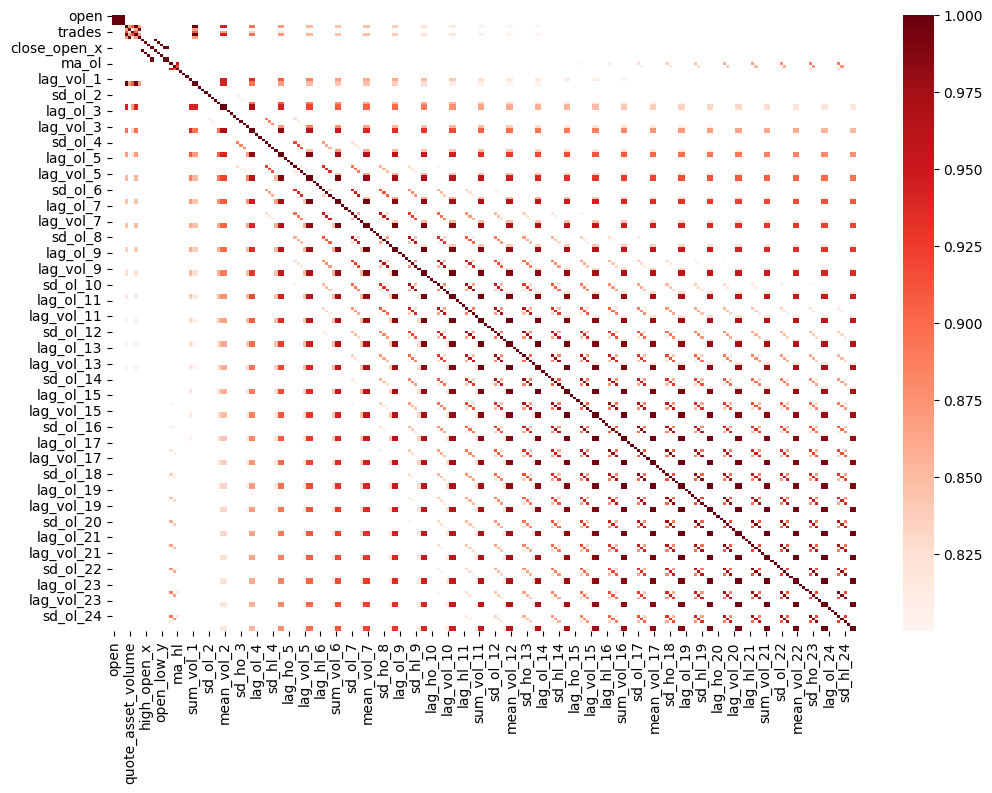

In [26]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='spearman')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")

                 open      high       low     close    volume  \
open         1.000000  0.329903 -0.497917 -0.900658       NaN   
high         0.329903  1.000000 -0.963469  0.054617       NaN   
low         -0.497917 -0.963469  1.000000  0.090974       NaN   
close       -0.900658  0.054617  0.090974  1.000000       NaN   
volume            NaN       NaN       NaN       NaN  1.000000   
...               ...       ...       ...       ...       ...   
sd_ho_24          NaN       NaN       NaN       NaN       NaN   
sd_hl_24          NaN       NaN       NaN       NaN       NaN   
lag_vol_24        NaN       NaN       NaN       NaN       NaN   
sum_vol_24        NaN       NaN       NaN       NaN -0.986909   
mean_vol_24       NaN       NaN       NaN       NaN -0.986909   

             quote_asset_volume    trades  buy_asset_volume  \
open                        NaN       NaN               NaN   
high                        NaN       NaN               NaN   
low                         Na

<AxesSubplot:>

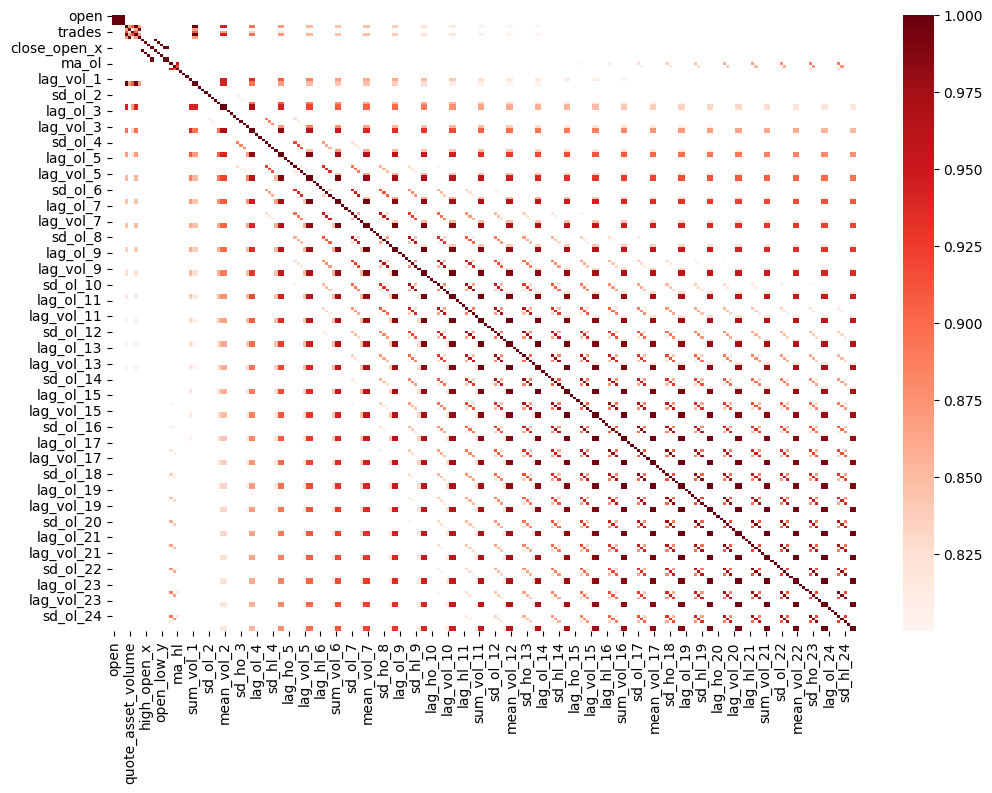

In [27]:
corr = correlation[correlation >= .80]
corr2 = corr.corr(method='pearson')
print(corr2)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="Reds")


In [28]:
cor_matrix = X.corr().abs()
print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
print(upper_tri)

                 open      high       low     close    volume  \
open         1.000000  0.999366  0.998940  0.998645  0.525291   
high         0.999366  1.000000  0.998638  0.999323  0.519734   
low          0.998940  0.998638  1.000000  0.999208  0.536239   
close        0.998645  0.999323  0.999208  1.000000  0.526918   
volume       0.525291  0.519734  0.536239  0.526918  1.000000   
...               ...       ...       ...       ...       ...   
sd_ho_24     0.545208  0.554449  0.538604  0.548533  0.255992   
sd_hl_24     0.446727  0.454202  0.433517  0.445003  0.160004   
lag_vol_24   0.521247  0.520957  0.522709  0.521652  0.598870   
sum_vol_24   0.659454  0.658307  0.661441  0.659361  0.762978   
mean_vol_24  0.659454  0.658307  0.661441  0.659361  0.762978   

             quote_asset_volume    trades  buy_asset_volume  \
open                   0.163802  0.471007          0.527803   
high                   0.152806  0.466092          0.521611   
low                    0.18478

C:\Users\Emilio\AppData\Local\Temp\ipykernel_25924\3860065349.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [29]:
# .5 according to JF, but not many features after that.
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= .80)]
print();
print(to_drop)


['high', 'low', 'close', 'quote_asset_volume', 'trades', 'buy_asset_volume', 'taker_buy_asset_volume', 'volatility_y', 'high_open_y', 'open_low_y', 'close_open_y', 'co', 'ma_hl', 'sum_vol_1', 'mean_vol_1', 'sum_vol_2', 'mean_vol_2', 'sd_ol_3', 'sd_ho_3', 'sd_hl_3', 'sum_vol_3', 'mean_vol_3', 'sd_ol_4', 'sd_ho_4', 'sd_hl_4', 'sum_vol_4', 'mean_vol_4', 'sd_ol_5', 'sd_ho_5', 'sd_hl_5', 'sum_vol_5', 'mean_vol_5', 'sd_ol_6', 'sd_ho_6', 'sd_hl_6', 'sum_vol_6', 'mean_vol_6', 'sd_ol_7', 'sd_ho_7', 'sd_hl_7', 'sum_vol_7', 'mean_vol_7', 'sd_ol_8', 'sd_ho_8', 'sd_hl_8', 'sum_vol_8', 'mean_vol_8', 'sd_ol_9', 'sd_ho_9', 'sd_hl_9', 'sum_vol_9', 'mean_vol_9', 'sd_ol_10', 'sd_ho_10', 'sd_hl_10', 'sum_vol_10', 'mean_vol_10', 'sd_ol_11', 'sd_ho_11', 'sd_hl_11', 'sum_vol_11', 'mean_vol_11', 'sd_ol_12', 'sd_ho_12', 'sd_hl_12', 'sum_vol_12', 'mean_vol_12', 'sd_ol_13', 'sd_ho_13', 'sd_hl_13', 'sum_vol_13', 'mean_vol_13', 'sd_ol_14', 'sd_ho_14', 'sd_hl_14', 'sum_vol_14', 'mean_vol_14', 'sd_ol_15', 'sd_ho_15

In [30]:
x = X.drop(X[to_drop], axis=1)
print();
print(x.head())
x.head()


                         open        volume  volatility_x  high_open_x  \
timestamp                                                                
2021-01-05 00:00:00  31989.75  20813.078600       1722.52       863.63   
2021-01-05 04:00:00  31190.04  23019.057178       1638.45       348.41   
2021-01-05 08:00:00  30817.78  13255.601100       1004.16      1004.16   
2021-01-05 12:00:00  31776.66  16243.276369       1263.29       598.41   
2021-01-05 16:00:00  32099.97  23832.165758       2423.86      2087.12   

                     open_low_x  close_open_x     ma_ol     ma_ho  lag_ol_1  \
timestamp                                                                     
2021-01-05 00:00:00      858.89       -789.75  785.4216  597.1552    809.44   
2021-01-05 04:00:00     1290.04       -372.27  827.6848  589.2368    858.89   
2021-01-05 08:00:00        0.00        958.88  808.8100  624.7396   1290.04   
2021-01-05 12:00:00      664.88        323.32  826.5812  636.2868      0.00   
2021-0

open        volume  volatility_x  high_open_x  \
timestamp                                                                
2021-01-05 00:00:00  31989.75  20813.078600       1722.52       863.63   
2021-01-05 04:00:00  31190.04  23019.057178       1638.45       348.41   
2021-01-05 08:00:00  30817.78  13255.601100       1004.16      1004.16   
2021-01-05 12:00:00  31776.66  16243.276369       1263.29       598.41   
2021-01-05 16:00:00  32099.97  23832.165758       2423.86      2087.12   

                     open_low_x  close_open_x     ma_ol     ma_ho  lag_ol_1  \
timestamp                                                                     
2021-01-05 00:00:00      858.89       -789.75  785.4216  597.1552    809.44   
2021-01-05 04:00:00     1290.04       -372.27  827.6848  589.2368    858.89   
2021-01-05 08:00:00        0.00        958.88  808.8100  624.7396   1290.04   
2021-01-05 12:00:00      664.88        323.32  826.5812  636.2868      0.00   
2021-01-05 16:00:00      336.74       1597.78  828.7168  708.3112    664.88   

                     lag_ho_1  ...  lag_hl_22    lag_vol_22  lag_ol_23  \
timestamp                      ...                                       
2021-01-05 00:00:00    365.49  ...     530.33   8283.705319     471.87   
2021-01-05 04:00:00    863.63  ...     569.86  11794.949515     220.60   
2021-01-05 08:00:00    348.41  ...     735.43   9850.965345     283.35   
2021-01-05 12:00:00   1004.16  ...     458.52   5383.938005     564.10   
2021-01-05 16:00:00    598.41  ...     522.47   7393.028526     148.67   

                     lag_ho_23  lag_hl_23    lag_vol_23  lag_ol_24  lag_ho_24  \
timestamp                                                                       
2021-01-05 00:00:00     116.59     588.46   7308.910274     233.46     546.37   
2021-01-05 04:00:00     309.73     530.33   8283.705319     471.87     116.59   
2021-01-05 08:00:00     286.51     569.86  11794.949515     220.60     309.73   
2021-01-05 12:00:00     171.33     735.43   9850.965345     283.35     286.51   
2021-01-05 16:00:00     309.85     458.52   5383.938005     564.10     171.33   

                     lag_hl_24    lag_vol_24  
timestamp                                     
2021-01-05 00:00:00     779.83  11560.456553  
2021-01-05 04:00:00     588.46   7308.910274  
2021-01-05 08:00:00     530.33   8283.705319  
2021-01-05 12:00:00     569.86  11794.949515  
2021-01-05 16:00:00     735.43   9850.965345  

[5 rows x 107 columns]

In [31]:
#  Min Max Scaler
scale = MinMaxScaler().fit(x)
X_scale = scale.transform(x)
X_scale = pd.DataFrame(X_scale, index=x.index, columns=x.columns)
X_scale.head()

open    volume  volatility_x  high_open_x  \
timestamp                                                            
2021-01-05 00:00:00  0.467072  0.095684      0.162400     0.150888   
2021-01-05 04:00:00  0.455396  0.105825      0.154473     0.060872   
2021-01-05 08:00:00  0.449960  0.060940      0.094672     0.175441   
2021-01-05 12:00:00  0.463961  0.074675      0.119103     0.104551   
2021-01-05 16:00:00  0.468681  0.109563      0.228522     0.364649   

                     open_low_x  close_open_x     ma_ol     ma_ho  lag_ol_1  \
timestamp                                                                     
2021-01-05 00:00:00    0.085891      0.430970  0.373884  0.508093  0.080946   
2021-01-05 04:00:00    0.129008      0.473783  0.395939  0.500624  0.085891   
2021-01-05 08:00:00    0.000000      0.610295  0.386089  0.534111  0.129008   
2021-01-05 12:00:00    0.066490      0.545117  0.395363  0.545003  0.000000   
2021-01-05 16:00:00    0.033675      0.675815  0.396478  0.612940  0.066490   

                     lag_ho_1  ...  lag_hl_22  lag_vol_22  lag_ol_23  \
timestamp                      ...                                     
2021-01-05 00:00:00  0.063856  ...   0.050000    0.038083   0.047188   
2021-01-05 04:00:00  0.150888  ...   0.053727    0.054225   0.022061   
2021-01-05 08:00:00  0.060872  ...   0.069336    0.045288   0.028336   
2021-01-05 12:00:00  0.175441  ...   0.043229    0.024752   0.056412   
2021-01-05 16:00:00  0.104551  ...   0.049259    0.033988   0.014867   

                     lag_ho_23  lag_hl_23  lag_vol_23  lag_ol_24  lag_ho_24  \
timestamp                                                                     
2021-01-05 00:00:00   0.020370   0.055480    0.033601   0.023347   0.095458   
2021-01-05 04:00:00   0.054114   0.050000    0.038083   0.047188   0.020370   
2021-01-05 08:00:00   0.050057   0.053727    0.054225   0.022061   0.054114   
2021-01-05 12:00:00   0.029934   0.069336    0.045288   0.028336   0.050057   
2021-01-05 16:00:00   0.054135   0.043229    0.024752   0.056412   0.029934   

                     lag_hl_24  lag_vol_24  
timestamp                                   
2021-01-05 00:00:00   0.073523    0.053147  
2021-01-05 04:00:00   0.055480    0.033601  
2021-01-05 08:00:00   0.050000    0.038083  
2021-01-05 12:00:00   0.053727    0.054225  
2021-01-05 16:00:00   0.069336    0.045288  

[5 rows x 107 columns]

In [32]:
# Normalizer
transformer = Normalizer(norm='max').fit(X_scale)
transformed = transformer.transform(X_scale)
X_normalized = pd.DataFrame(transformed, index=x.index, columns=x.columns)
X_normalized.head()

open    volume  volatility_x  high_open_x  \
timestamp                                                            
2021-01-05 00:00:00  0.919265  0.188319      0.319626     0.296970   
2021-01-05 04:00:00  0.909656  0.211387      0.308562     0.121593   
2021-01-05 08:00:00  0.737283  0.099853      0.155126     0.287469   
2021-01-05 12:00:00  0.851121  0.136989      0.218491     0.191795   
2021-01-05 16:00:00  0.693505  0.162120      0.338143     0.539569   

                     open_low_x  close_open_x     ma_ol     ma_ho  lag_ol_1  \
timestamp                                                                     
2021-01-05 00:00:00    0.169047      0.848211  0.735858  1.000000  0.159314   
2021-01-05 04:00:00    0.257694      0.946386  0.790892  1.000000  0.171569   
2021-01-05 08:00:00    0.000000      1.000000  0.632627  0.875169  0.211386   
2021-01-05 12:00:00    0.121974      1.000000  0.725281  0.999791  0.000000   
2021-01-05 16:00:00    0.049829      1.000000  0.586666  0.906964  0.098385   

                     lag_ho_1  ...  lag_hl_22  lag_vol_22  lag_ol_23  \
timestamp                      ...                                     
2021-01-05 00:00:00  0.125678  ...   0.098407    0.074952   0.092874   
2021-01-05 04:00:00  0.301401  ...   0.107319    0.108314   0.044066   
2021-01-05 08:00:00  0.099742  ...   0.113611    0.074206   0.046430   
2021-01-05 12:00:00  0.321841  ...   0.079303    0.045406   0.103485   
2021-01-05 16:00:00  0.154703  ...   0.072888    0.050292   0.021999   

                     lag_ho_23  lag_hl_23  lag_vol_23  lag_ol_24  lag_ho_24  \
timestamp                                                                     
2021-01-05 00:00:00   0.040091   0.109193    0.066132   0.045950   0.187876   
2021-01-05 04:00:00   0.108094   0.099875    0.076070   0.094259   0.040689   
2021-01-05 08:00:00   0.082021   0.088034    0.088850   0.036148   0.088669   
2021-01-05 12:00:00   0.054913   0.127196    0.083079   0.051981   0.091829   
2021-01-05 16:00:00   0.080103   0.063966    0.036625   0.083472   0.044293   

                     lag_hl_24  lag_vol_24  
timestamp                                   
2021-01-05 00:00:00   0.144703    0.104601  
2021-01-05 04:00:00   0.110822    0.067119  
2021-01-05 08:00:00   0.081927    0.062400  
2021-01-05 12:00:00   0.098560    0.099474  
2021-01-05 16:00:00   0.102597    0.067012  

[5 rows x 107 columns]

In [33]:
x = X_normalized.copy()
x.head()

open    volume  volatility_x  high_open_x  \
timestamp                                                            
2021-01-05 00:00:00  0.919265  0.188319      0.319626     0.296970   
2021-01-05 04:00:00  0.909656  0.211387      0.308562     0.121593   
2021-01-05 08:00:00  0.737283  0.099853      0.155126     0.287469   
2021-01-05 12:00:00  0.851121  0.136989      0.218491     0.191795   
2021-01-05 16:00:00  0.693505  0.162120      0.338143     0.539569   

                     open_low_x  close_open_x     ma_ol     ma_ho  lag_ol_1  \
timestamp                                                                     
2021-01-05 00:00:00    0.169047      0.848211  0.735858  1.000000  0.159314   
2021-01-05 04:00:00    0.257694      0.946386  0.790892  1.000000  0.171569   
2021-01-05 08:00:00    0.000000      1.000000  0.632627  0.875169  0.211386   
2021-01-05 12:00:00    0.121974      1.000000  0.725281  0.999791  0.000000   
2021-01-05 16:00:00    0.049829      1.000000  0.586666  0.906964  0.098385   

                     lag_ho_1  ...  lag_hl_22  lag_vol_22  lag_ol_23  \
timestamp                      ...                                     
2021-01-05 00:00:00  0.125678  ...   0.098407    0.074952   0.092874   
2021-01-05 04:00:00  0.301401  ...   0.107319    0.108314   0.044066   
2021-01-05 08:00:00  0.099742  ...   0.113611    0.074206   0.046430   
2021-01-05 12:00:00  0.321841  ...   0.079303    0.045406   0.103485   
2021-01-05 16:00:00  0.154703  ...   0.072888    0.050292   0.021999   

                     lag_ho_23  lag_hl_23  lag_vol_23  lag_ol_24  lag_ho_24  \
timestamp                                                                     
2021-01-05 00:00:00   0.040091   0.109193    0.066132   0.045950   0.187876   
2021-01-05 04:00:00   0.108094   0.099875    0.076070   0.094259   0.040689   
2021-01-05 08:00:00   0.082021   0.088034    0.088850   0.036148   0.088669   
2021-01-05 12:00:00   0.054913   0.127196    0.083079   0.051981   0.091829   
2021-01-05 16:00:00   0.080103   0.063966    0.036625   0.083472   0.044293   

                     lag_hl_24  lag_vol_24  
timestamp                                   
2021-01-05 00:00:00   0.144703    0.104601  
2021-01-05 04:00:00   0.110822    0.067119  
2021-01-05 08:00:00   0.081927    0.062400  
2021-01-05 12:00:00   0.098560    0.099474  
2021-01-05 16:00:00   0.102597    0.067012  

[5 rows x 107 columns]

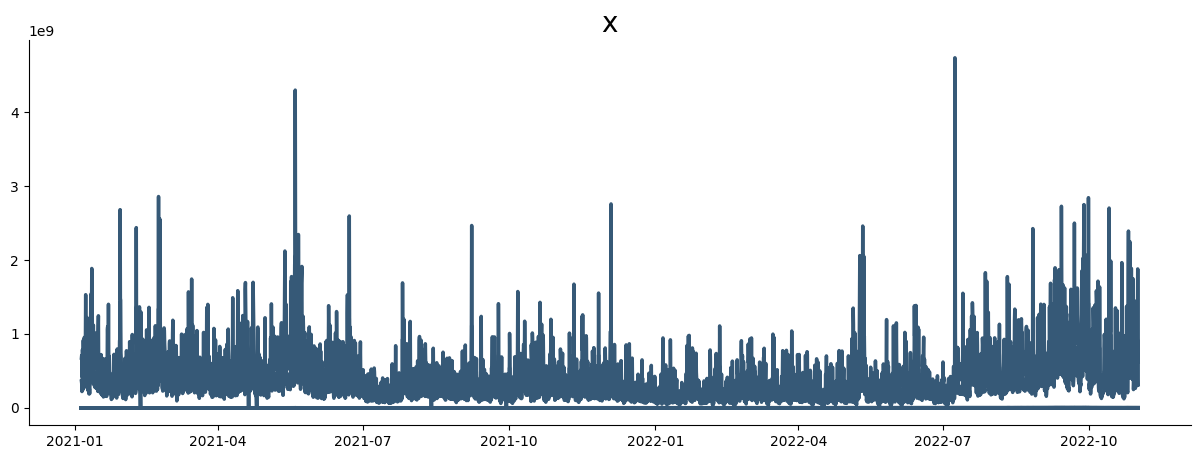

In [34]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5
plt.title('x', size=20)
plt.plot(X);

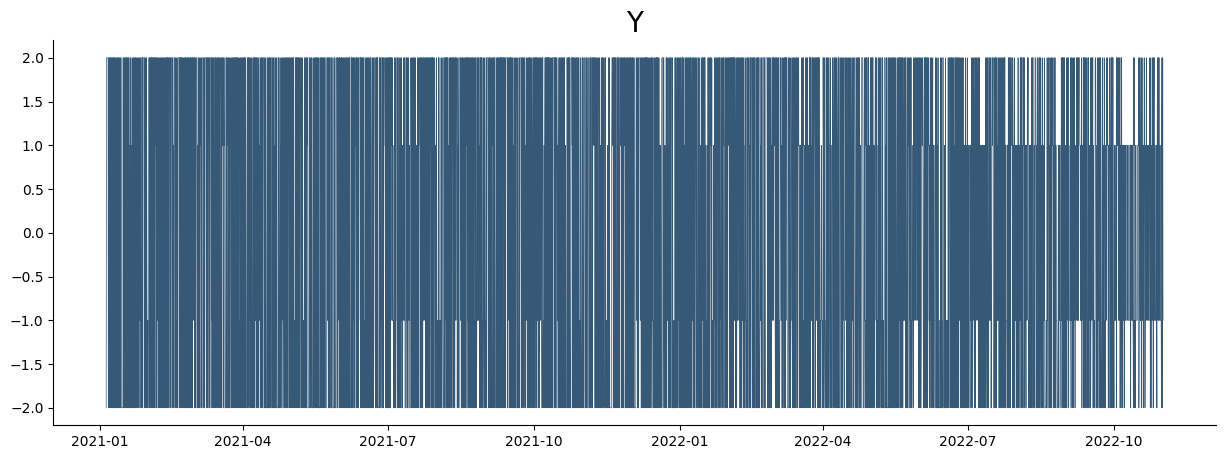

In [35]:
rcParams['figure.figsize'] = 15, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = .5
plt.title('Y', size=20)
plt.plot(y);

In [61]:
test_size = int(len(x) * .30)
trial_size = int(len(x) * .10)
X_train = x[:-test_size].copy()
X_test = x[-test_size:].copy()
X_test = X_test[:-trial_size].copy()
X_trial = X_test[-trial_size:].copy()

X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_trial2 = X_trial.copy()

X_train3 = X_train.copy()
X_test3 = X_test.copy()
X_trial3 = X_trial.copy()

X_train4 = X_train.copy()
X_test4 = X_test.copy()
X_trial4 = X_trial.copy()

X_train5 = X_train.copy()
X_test5 = X_test.copy()
X_trial5 = X_trial.copy()

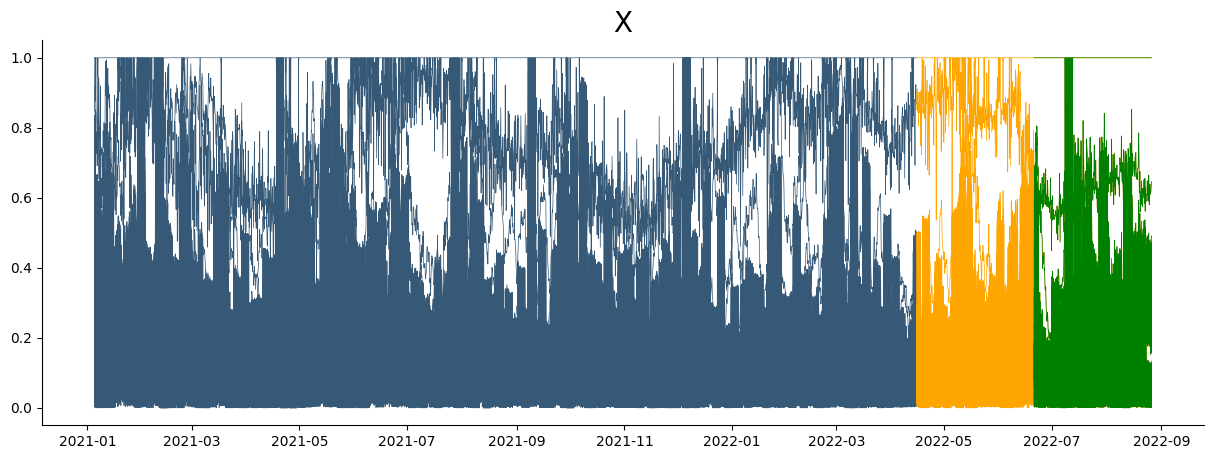

In [37]:
plt.title('X', size=20)
plt.plot(X_train)  # ,label='Training set')
plt.plot(X_test, label='Test set', color='orange')
plt.plot(X_trial,label= 'Trial set',color='green')
plt.legend;


In [60]:
y_train = y[:-test_size].copy()
y_test = y[-test_size:].copy()
y_test = y_test[:-trial_size].copy()
y_trial = y_test[-trial_size:].copy()

y_train2 = y_train.copy()
y_test2 = y_test.copy()
y_trial2 = y_trial.copy()

y_train3 = y_train.copy()
y_test3 = y_test.copy()
y_trial3 = y_trial.copy()

y_train4 = y_train.copy()
y_test4 = y_test.copy()
y_trial4 = y_trial.copy()

y_train5 = y_train.copy()
y_test5 = y_test.copy()
y_trial5 = y_trial.copy()

Y_train_dum = pd.get_dummies(y_train5, prefix='y')
Y_test_dum = pd.get_dummies(y_test5, prefix='y')
Y_trial_dum = pd.get_dummies(y_trial5,prefix='y')

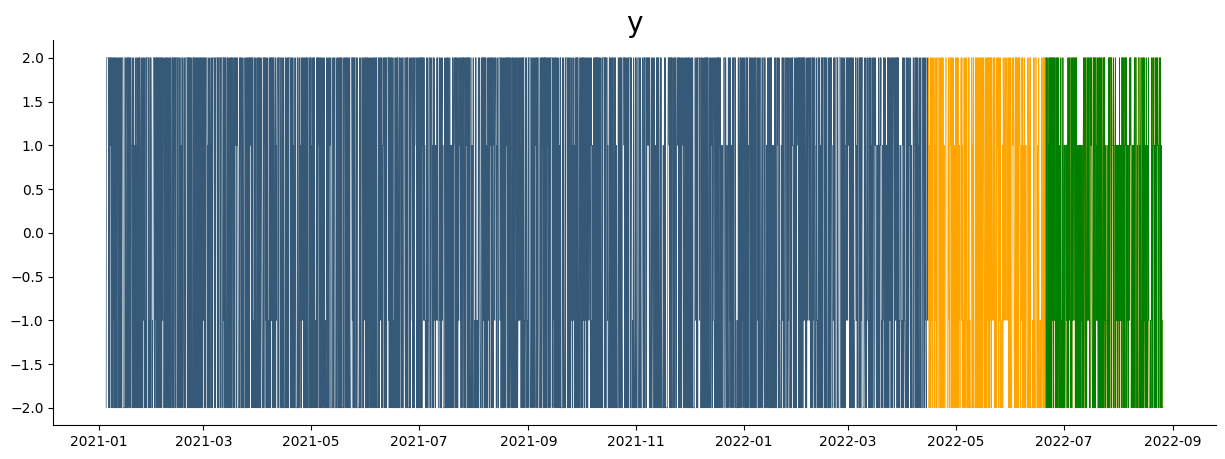

In [39]:
plt.title('y', size=20)
plt.plot(y_train, label='Training set')
plt.plot(y_test, label='Test set', color='orange')
plt.plot(y_trial,label='Trial set',color='green')
plt.legend;


In [40]:
#naive bayes
# %% Naive Bayes
print(X_train.shape, X_test.shape)
# instantiate the model
gnb = GaussianNB()
# gnb = CategoricalNB()
# pgmpy()

# fit the model
gnb.fit(X_train2, y_train2)

(2793, 107) (798, 107)


GaussianNB()

In [41]:
y_train

timestamp
2021-01-05 00:00:00   -2.0
2021-01-05 04:00:00    2.0
2021-01-05 08:00:00    2.0
2021-01-05 12:00:00    2.0
2021-01-05 16:00:00    2.0
                      ... 
2022-04-14 16:00:00    2.0
2022-04-14 20:00:00    2.0
2022-04-15 00:00:00    1.0
2022-04-15 04:00:00   -1.0
2022-04-15 08:00:00    2.0
Name: y_hat, Length: 2793, dtype: float64

In [42]:
y_pred2 = gnb.predict(X_test2)

In [43]:
accuracy_naive = (accuracy_score(y_test2, y_pred2)) * 100
recall_naive = recall_score(y_test2, y_pred2, average='weighted') * 100
precision_naive = precision_score(y_test2, y_pred2, average='weighted', zero_division=0) * 100
f1_naive = f1_score(y_test2, y_pred2, average='weighted') * 100
balanced_naive = balanced_accuracy_score(y_test2, y_pred2) * 100
print('Accuracy:', accuracy_naive, '%')
print('Recall:', recall_naive, '%')
print('Precision:', precision_naive, '%')
print('F1:', f1_naive, '%')
print('Balanced Accuracy:', balanced_naive, '%')

Accuracy: 27.06766917293233 %
Recall: 27.06766917293233 %
Precision: 28.127838476950423 %
F1: 24.89593512319577 %
Balanced Accuracy: 25.770533049851064 %


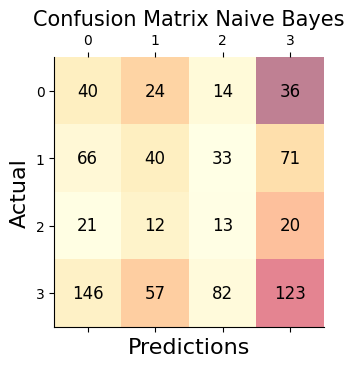

In [44]:
y_pred_train = gnb.predict(X_train2)
conf_mat = confusion_matrix(y_test2, y_pred2)
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(conf_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(conf_mat.shape[0]):
    for n in range(conf_mat.shape[1]):
        px.text(x=m, y=n, s=conf_mat[m, n], va='center', ha='center', size='large')
# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actual', fontsize=16)
plt.title('Confusion Matrix Naive Bayes', fontsize=15)
plt.show()

In [45]:
y_pred2_trial = gnb.predict(X_trial2)

In [46]:
accuracy_naive2 = (accuracy_score(y_trial2, y_pred2_trial)) * 100
recall_naive2 = recall_score(y_trial2, y_pred2_trial, average='weighted') * 100
precision_naive2 = precision_score(y_trial2, y_pred2_trial, average='weighted', zero_division=0) * 100
f1_naive2 = f1_score(y_trial2, y_pred2_trial, average='weighted') * 100
balanced_naive2 = balanced_accuracy_score(y_trial2, y_pred2_trial) * 100
print('Accuracy:', accuracy_naive2, '%')
print('Recall:', recall_naive2, '%')
print('Precision:', precision_naive2, '%')
print('F1:', f1_naive2, '%')
print('Balanced Accuracy:', balanced_naive2, '%')

Accuracy: 28.57142857142857 %
Recall: 28.57142857142857 %
Precision: 25.842277424866232 %
F1: 22.604538158460556 %
Balanced Accuracy: 25.273818664046377 %


In [47]:
# Logistic regression simple
logistic_model_simple = LogisticRegression(max_iter=1000000)
logistic_model_simple.fit(X_train,y_train)

LogisticRegression(max_iter=1000000)

In [48]:
# logistic_model.predict_proba((X[:2, :])
y_pred = logistic_model_simple.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
print(accuracy)


31.453634085213032


In [49]:
logistic_model_simple.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
# si fueron 0 se quitaron por efecto de la regularizacion L1 y son:
# si
coef = logistic_model_simple.coef_
print(logistic_model_simple.intercept_)
print(coef)

[ 0.71039224 -0.48715282 -0.9212479   0.69800848]
[[ 0.08343633  0.29066466  0.32787545  0.86845796 -0.14931141 -0.71099693
   0.60831723  0.49945756  0.09082701  0.02370438  0.09842091  0.37195322
   0.13791755 -0.20829454  0.01762404  0.25770304 -0.3531154  -0.46094982
   0.01589484 -0.13195108 -0.17964912 -0.22134348 -0.64328742 -0.08552611
  -0.03701289 -0.10060497  0.40614332 -0.14865515  0.22515449 -0.01864911
   0.36074465 -0.22554635 -0.08765299 -0.25993923  0.18085286  0.03013109
  -0.20161713 -0.08039101 -0.19530837 -0.17385924 -0.10416787 -0.22012179
   0.15457979  0.23411975 -0.15205415  0.13866981 -0.35880923  0.35120696
  -0.220419    0.21216524 -0.33694171 -0.15987587  0.58100041  0.16279598
  -0.34939512  0.39479623 -0.23214018  0.24693505 -0.39201187 -0.06069728
  -0.24090176 -0.18722071  0.19144216  0.08106215  0.07218564  0.11537659
   0.13495238  0.17579373 -0.43533595 -0.0691847  -0.01047919  0.0267686
   0.11804763  0.08893832 -0.1694774  -0.30184553  0.2647903  -

In [51]:
predict_ = logistic_model_simple.predict_proba(X_train)
print(predict_)

[[0.26298067 0.01503894 0.01943308 0.70254731]
 [0.2204938  0.02247616 0.01973872 0.73729131]
 [0.41045355 0.10214315 0.04353568 0.44386761]
 ...
 [0.36287462 0.14187448 0.13159525 0.36365565]
 [0.34093063 0.14077728 0.14301412 0.37527798]
 [0.48947525 0.09209341 0.10808296 0.31034838]]


(1.0, 30000.0, -3.0, 3.0)

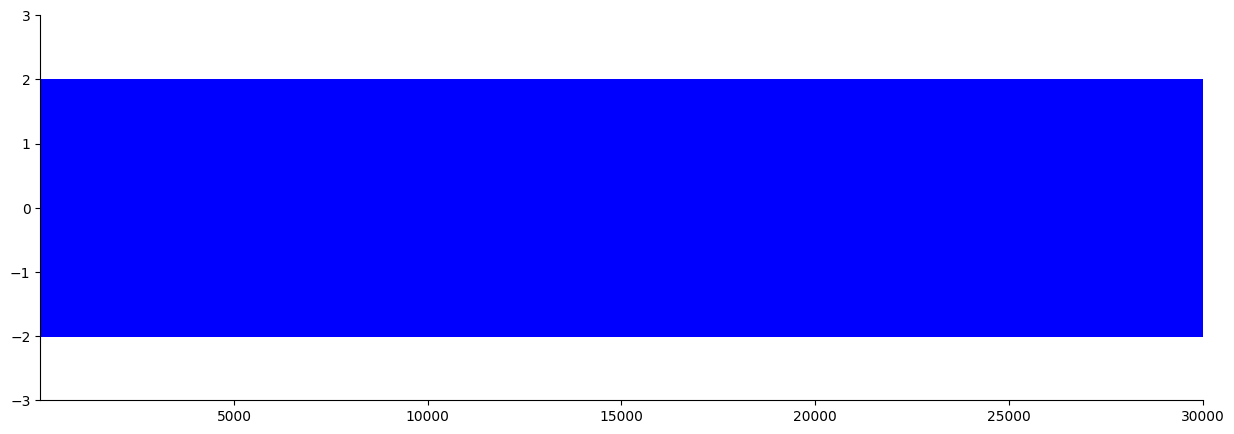

In [52]:
plt.plot(X_test, y_pred, 'r')
plt.plot(X, y_true, 'b')
plt.axis([1, 30000, -3, 3])


In [53]:
y_pred_simple = logistic_model_simple.predict(X_test)
accuracy_logistic_simple = accuracy_score(y_test, y_pred) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_test, y_pred)
recall_logistic_simple = recall_score(y_test, y_pred, average='weighted') * 100
precision_logistic_simple = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
f1_logistic_simple = f1_score(y_test, y_pred, average='weighted') * 100
balanced_logistic_simple = balanced_accuracy_score(y_test, y_pred) * 100

print('Accuracy:', accuracy_logistic_simple, '%')
print('Recall:', recall_logistic_simple, '%')
print('Precision:', precision_logistic_simple, '%')
print('F1:', f1_logistic_simple, '%')
print('Balanced Accuracy:', balanced_logistic_simple, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 31.453634085213032 %
Recall: 31.453634085213032 %
Precision: 27.175411647398068 %
F1: 23.253679118350302 %
Balanced Accuracy: 24.66562560246771 %
Confusion Matrix:
[[ 62   0   0 211]
 [ 30   1   0 102]
 [ 23   0   0 119]
 [ 60   2   0 188]]


In [54]:
y_pred_simple2 = logistic_model_simple.predict(X_trial)
accuracy = accuracy_score(y_trial, y_pred_simple2) * 100
logistic_model_simple.score(x, y)
confusion_mat = confusion_matrix(y_trial, y_pred_simple2)
print(accuracy)

31.57894736842105


In [163]:
# Regression with Elastic Net and hiper parameters optimization


In [76]:
logg = []
for i in l1_ratio:
    for j in weig:
        # model fit
        logistic_model = LogisticRegression(random_state=False, penalty='elasticnet',
                                            solver='saga', l1_ratio=i, max_iter=1000000, C=1,
                                            class_weight= j, )
        model_history = logistic_model.fit(X_train3, y_train3)
        logg.append(model_history)
    
gd_lm = GridSeachCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [157]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [183]:
pipelineLR = make_pipeline(
LogisticRegression(random_state=False, penalty='elasticnet',solver ='saga', max_iter=1000000, C=1
 ))
param_grid_lr = [{
    'logisticregression__l1_ratio':[.10,.20,.30,.40,.50,.60,.70,.80,.90],
    'logisticregression__class_weight':[None,'balanced'],
    'logisticregression__C':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0],
    'logisticregression__solver':['newton-cg', 'sag', 'saga','lbfgs']
}]
gd_lm = GridSearchCV(estimator=pipelineLR,
                     param_grid=param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
gd_lm.fit(X_train3, y_train3)
print(gd_lm.best_score_)

C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


3780 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Emilio\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Emilio\AppData\Local\Programs\Python\Pytho

0.42784178187403993


In [184]:
gd_lm.best_params_

{'logisticregression__C': 0.5,
 'logisticregression__class_weight': None,
 'logisticregression__l1_ratio': 0.9,
 'logisticregression__solver': 'saga'}

In [186]:
clfLR = gd_lm.best_estimator_
clfLR

Pipeline(steps=[('logisticregression',
                 LogisticRegression(C=0.5, l1_ratio=0.9, max_iter=1000000,
                                    penalty='elasticnet', random_state=False,
                                    solver='saga'))])

In [191]:
clfLR.score(X_test3, y_test3)

0.3258145363408521

In [192]:
logistic_model = LogisticRegression(random_state=False, penalty='elasticnet',
                                            solver='saga', l1_ratio=0.9, max_iter=1000000, C=0.5,
                                            class_weight= None, )
logistic_model.fit(X_train3, y_train3)

LogisticRegression(C=0.5, l1_ratio=0.9, max_iter=1000000, penalty='elasticnet',
                   random_state=False, solver='saga')

In [197]:
y_pred3 = logistic_model.predict(X_test3)
accuracy = accuracy_score(y_test3, y_pred3) * 100
logistic_model.score(x, y)
confusion_mat = confusion_matrix(y_test3, y_pred3)

y_pred_trial = logistic_model.predict(X_trial3)
accuracy_trial = accuracy_score(y_trial3, y_pred_trial) * 100
logistic_model.score(x, y)
print(accuracy)
print(accuracy_trial)

32.581453634085214
31.57894736842105


In [198]:
pickle.dump(clfLR, open('logg.pkl', 'wb'))

In [203]:
recall_logistic = recall_score(y_test3, y_pred3, average='weighted') * 100
precision_logistic = precision_score(y_test3, y_pred3, average='weighted', zero_division=0) * 100
f1_logistic = f1_score(y_test3, y_pred3, average='weighted') * 100
balanced_logistic = balanced_accuracy_score(y_test3, y_pred3) * 100

print('Accuracy:', accuracy_logistic, '%')
print('Recall:', recall_logistic, '%')
print('Precision:', precision_logistic, '%')
print('F1:', f1_logistic, '%')
print('Balanced Accuracy:', balanced_logistic, '%')
print("Confusion Matrix:")

print(confusion_mat)


Accuracy: 31.203007518796994 %
Recall: 32.581453634085214 %
Precision: 21.36412702953035 %
F1: 25.806288343563576 %
Balanced Accuracy: 24.77838827838828 %
Confusion Matrix:
[[145   0   0 128]
 [ 64   0   0  69]
 [ 70   0   0  72]
 [135   0   0 115]]


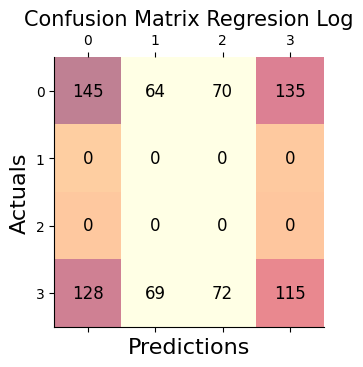

In [204]:
fig, px = plt.subplots(figsize=(3.5, 3.5))
px.matshow(confusion_mat, cmap=plt.cm.YlOrRd, alpha=0.5)
for m in range(confusion_mat.shape[0]):
    for n in range(confusion_mat.shape[1]):
        px.text(x=m, y=n, s=confusion_mat[m, n], va='center', ha='center', size='large')

# Sets the labels
plt.xlabel('Predictions', fontsize=16)
plt.ylabel('Actuals', fontsize=16)
plt.title('Confusion Matrix Regresion Log', fontsize=15)
plt.show()

# Random Forest

In [250]:
seed = 4

In [225]:
pipelineRFC = make_pipeline(
RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators=1000))

param_grid_rfc = [{
    'randomforestclassifier__max_features':['sqrt', 'log2', None],
    'randomforestclassifier__criterion':['gini','entropy','log_loss'],
    #'ranfomforestclassifier__n_estimators':[100, 500,1000]    
}]

gsrfc =GridSearchCV(estimator= pipelineRFC,
                   param_grid=param_grid_rfc,
                   scoring='accuracy',
                   cv=10,
                   n_jobs=1)
gs_rfc =gsrfc.fit(X_train4,y_train4)
print(gs_rfc.best_score_)

0.4268023553507424


In [257]:
print(gs_rfc.best_params_)


{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_features': 'sqrt'}


In [256]:
clfRFC = gs_rfc.best_estimator_
clfRFC

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000))])

In [254]:
clfRFC.score(X_test4, y_test4)

1.0

In [259]:
# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=None,
                             max_features='sqrt', min_samples_split=2,
                             oob_score=True,n_jobs=4, criterion= 'gini')

# Train the model using the training sets
clf.fit(X_train4, y_train4)


RandomForestClassifier(n_estimators=1000, n_jobs=4, oob_score=True)

In [267]:
pickle.dump(clfRFC, open('forest.pkl', 'wb'))

In [270]:
# performing predictions on the test dataset
y_pred4 = clf.predict(X_test4)
accuracy_forest = accuracy_score(y_test4, y_pred4) * 100
print(clf.score(X_test4, y_test4))

0.3433583959899749


In [273]:
# performing predictions on the trial dataset
y_pred4_trial = clf.predict(X_trial4)
accuracy_forest_trial = accuracy_score(y_trial4, y_pred4_trial) * 100
print(clf.score(X_trial4, y_trial4))

0.3358395989974937


In [275]:
confusion_mat = confusion_matrix(y_test4, y_pred4)

In [274]:
recall_forest = recall_score(y_test4, y_pred4, average='weighted') * 100
precision_forest = precision_score(y_test4, y_pred4, average='weighted', zero_division=0) * 100
f1_forest = f1_score(y_test4, y_pred4, average='weighted') * 100
balanced_forest = balanced_accuracy_score(y_test4, y_pred4) * 100

print('Accuracy:', accuracy_forest, '%')
print('Recall:', recall_forest, '%')
print('Precision:', precision_forest, '%')
print('F1:', f1_forest, '%')
print('Balanced Accuracy:', balanced_forest, '%')
print("Confusion Matrix:")

print(confusion_mat)

Accuracy: 34.335839598997495 %
Recall: 34.335839598997495 %
Precision: 23.155341212779014 %
F1: 26.61136205952087 %
Balanced Accuracy: 26.565934065934066 %
Confusion Matrix:
[[ 99   0   0 174]
 [ 47   0   0  86]
 [ 41   0   0 101]
 [ 75   0   0 175]]


## Multilayer perceptron for Classification

In [464]:
n_inputs = len(list(X_train5.columns))
neuron_quant = [n_inputs, n_inputs+2,n_inputs+4,n_inputs+8,n_inputs+16,n_inputs+32,n_inputs+64]
quant_hidden = [1,2]
learning_rate = [0.01,0.1,0.5,1]
batch_size = [1,8,16]
import tensorflow as tf
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from  sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from keras.callbacks import EarlyStopping

In [476]:

import tensorflow_addons as tfa


ModuleNotFoundError: No module named 'metric'

In [509]:
recc = []
fitness=0
model_best =[]
for i in neuron_quant:
    for j in quant_hidden:
        for k in batch_size:
                
               

                # Agregar: learning rate, momentum, nesterov, dropout, modificar capas, neuronas por capa, funcion activacion
                # por capa.
                n_inputs = len(list(X_train5.columns))
                # Neural network structure
                model = Sequential()
                
                model.add(Dense(n_inputs, activation='sigmoid', input_shape=(n_inputs,)))
                # model.add(Dense(10, activation='softplus'))
                model.add(Dense(i, activation='sigmoid'))
                model.add(Dense(4, activation='softmax'))
                # Optimizer configuration
                # model.compile(loss='binary_crossentropy',
                # with no one hot encoding
                #model.compile(loss='sparse_categorical_crossentropy',
                #              optimizer='Adam',
                #              metrics=['accuracy'])
                # with one hot encoding
                model.compile(loss='categorical_crossentropy',
                              optimizer='Adam',
                              metrics=['accuracy'])
                model_history = model.fit(X_train5, Y_train_dum, epochs=50, batch_size=k, verbose=1,
                                         validation_data=(X_test5,Y_test_dum))
                score = model.evaluate(X_test5, Y_test_dum,verbose=1)
                Y_prob = model.predict(X_test5)
                R2_score_val = r2_score(Y_test_dum, Y_prob)
                metric = tfa.metrics.F1Score(num_classes=4, threshold=0.5)
                metric.update_state(Y_test_dum, Y_prob)
                result = metric.result()
                result_mean= np.mean(result)

                result.numpy()
                if result_mean > fitness:
                    model_best = model
                fitness = result_mean
                
                #model.evalu model.evaluate(x_test, y_test, batch_size=128) 
                recc.append(model_history)
model.save_weights(route+'weights')

Epoch 1/50
2793/2793 [==============================] - 14s 5ms/step - loss: 1.1788 - accuracy: 0.4089 - val_loss: 1.5002 - val_accuracy: 0.3434
Epoch 2/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1533 - accuracy: 0.4189 - val_loss: 1.5209 - val_accuracy: 0.3133
Epoch 3/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1427 - accuracy: 0.4239 - val_loss: 1.4163 - val_accuracy: 0.3120
Epoch 4/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1403 - accuracy: 0.4339 - val_loss: 1.3935 - val_accuracy: 0.3133
Epoch 5/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1354 - accuracy: 0.4250 - val_loss: 1.3657 - val_accuracy: 0.3396
Epoch 6/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1332 - accuracy: 0.4329 - val_loss: 1.3408 - val_accuracy: 0.3283
Epoch 7/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1272 - accuracy: 0.4379 - val_loss: 1.4032 - val_accurac

350/350 [==============================] - 2s 7ms/step - loss: 1.1348 - accuracy: 0.4433 - val_loss: 1.3609 - val_accuracy: 0.3133
Epoch 7/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1334 - accuracy: 0.4407 - val_loss: 1.3632 - val_accuracy: 0.3333
Epoch 8/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1323 - accuracy: 0.4440 - val_loss: 1.4122 - val_accuracy: 0.3258
Epoch 9/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1293 - accuracy: 0.4411 - val_loss: 1.3417 - val_accuracy: 0.3195
Epoch 10/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1289 - accuracy: 0.4422 - val_loss: 1.3660 - val_accuracy: 0.3271
Epoch 11/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1316 - accuracy: 0.4300 - val_loss: 1.3542 - val_accuracy: 0.3283
Epoch 12/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1229 - accuracy: 0.4314 - val_loss: 1.3385 - val_accuracy: 0.3283
Epoch 13/50
35

175/175 [==============================] - 2s 10ms/step - loss: 1.1251 - accuracy: 0.4461 - val_loss: 1.3750 - val_accuracy: 0.3333
Epoch 13/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1240 - accuracy: 0.4497 - val_loss: 1.3736 - val_accuracy: 0.3409
Epoch 14/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1230 - accuracy: 0.4529 - val_loss: 1.3580 - val_accuracy: 0.3296
Epoch 15/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1224 - accuracy: 0.4544 - val_loss: 1.3674 - val_accuracy: 0.3296
Epoch 16/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1209 - accuracy: 0.4644 - val_loss: 1.3464 - val_accuracy: 0.3233
Epoch 17/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1210 - accuracy: 0.4472 - val_loss: 1.3894 - val_accuracy: 0.3208
Epoch 18/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1224 - accuracy: 0.4422 - val_loss: 1.3467 - val_accuracy: 0.3208
Epoch 19/5

2793/2793 [==============================] - 9s 3ms/step - loss: 1.1099 - accuracy: 0.4672 - val_loss: 1.3440 - val_accuracy: 0.3283
Epoch 19/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1074 - accuracy: 0.4654 - val_loss: 1.3370 - val_accuracy: 0.3333
Epoch 20/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1057 - accuracy: 0.4640 - val_loss: 1.3547 - val_accuracy: 0.3233
Epoch 21/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1040 - accuracy: 0.4723 - val_loss: 1.3496 - val_accuracy: 0.3208
Epoch 22/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1006 - accuracy: 0.4690 - val_loss: 1.3532 - val_accuracy: 0.3258
Epoch 23/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1019 - accuracy: 0.4658 - val_loss: 1.3787 - val_accuracy: 0.3221
Epoch 24/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0987 - accuracy: 0.4672 - val_loss: 1.3795 - val_accuracy: 0.32

Epoch 24/50
350/350 [==============================] - 3s 10ms/step - loss: 1.1158 - accuracy: 0.4640 - val_loss: 1.3561 - val_accuracy: 0.2970
Epoch 25/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1109 - accuracy: 0.4680 - val_loss: 1.3699 - val_accuracy: 0.3208
Epoch 26/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1125 - accuracy: 0.4601 - val_loss: 1.3522 - val_accuracy: 0.3346
Epoch 27/50
350/350 [==============================] - 4s 12ms/step - loss: 1.1100 - accuracy: 0.4665 - val_loss: 1.3610 - val_accuracy: 0.3208
Epoch 28/50
350/350 [==============================] - 4s 10ms/step - loss: 1.1133 - accuracy: 0.4572 - val_loss: 1.3694 - val_accuracy: 0.2995
Epoch 29/50
350/350 [==============================] - 4s 13ms/step - loss: 1.1113 - accuracy: 0.4633 - val_loss: 1.3577 - val_accuracy: 0.3296
Epoch 30/50
350/350 [==============================] - 4s 10ms/step - loss: 1.1100 - accuracy: 0.4654 - val_loss: 1.3787 - val_accuracy: 0

175/175 [==============================] - 1s 7ms/step - loss: 1.1141 - accuracy: 0.4637 - val_loss: 1.3602 - val_accuracy: 0.3221
Epoch 31/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1140 - accuracy: 0.4558 - val_loss: 1.3687 - val_accuracy: 0.3221
Epoch 32/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1105 - accuracy: 0.4640 - val_loss: 1.3503 - val_accuracy: 0.3233
Epoch 33/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1106 - accuracy: 0.4626 - val_loss: 1.3557 - val_accuracy: 0.3195
Epoch 34/50
175/175 [==============================] - 1s 6ms/step - loss: 1.1114 - accuracy: 0.4637 - val_loss: 1.3653 - val_accuracy: 0.3070
Epoch 35/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1109 - accuracy: 0.4665 - val_loss: 1.3458 - val_accuracy: 0.3221
Epoch 36/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1117 - accuracy: 0.4654 - val_loss: 1.3835 - val_accuracy: 0.3045
Epoch 37/50

Epoch 36/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0808 - accuracy: 0.4816 - val_loss: 1.3672 - val_accuracy: 0.3346
Epoch 37/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0804 - accuracy: 0.4680 - val_loss: 1.3571 - val_accuracy: 0.3434
Epoch 38/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0767 - accuracy: 0.4733 - val_loss: 1.3838 - val_accuracy: 0.3308
Epoch 39/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0746 - accuracy: 0.4862 - val_loss: 1.3763 - val_accuracy: 0.3258
Epoch 40/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0714 - accuracy: 0.4726 - val_loss: 1.3482 - val_accuracy: 0.3246
Epoch 41/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0710 - accuracy: 0.4787 - val_loss: 1.3730 - val_accuracy: 0.3484
Epoch 42/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0679 - accuracy: 0.4805 - val_loss: 1.3631 - val_ac

350/350 [==============================] - 2s 7ms/step - loss: 1.1044 - accuracy: 0.4651 - val_loss: 1.3983 - val_accuracy: 0.3321
Epoch 43/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1063 - accuracy: 0.4518 - val_loss: 1.3765 - val_accuracy: 0.3120
Epoch 44/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1060 - accuracy: 0.4662 - val_loss: 1.3856 - val_accuracy: 0.3321
Epoch 45/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1007 - accuracy: 0.4701 - val_loss: 1.3648 - val_accuracy: 0.3271
Epoch 46/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1013 - accuracy: 0.4619 - val_loss: 1.4013 - val_accuracy: 0.3271
Epoch 47/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1056 - accuracy: 0.4637 - val_loss: 1.3675 - val_accuracy: 0.3058
Epoch 48/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1022 - accuracy: 0.4619 - val_loss: 1.3747 - val_accuracy: 0.2982
Epoch 49/50

175/175 [==============================] - 1s 7ms/step - loss: 1.1053 - accuracy: 0.4629 - val_loss: 1.3843 - val_accuracy: 0.3083
Epoch 49/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1053 - accuracy: 0.4579 - val_loss: 1.3811 - val_accuracy: 0.2995
Epoch 50/50
25/25 [==============================] - 0s 4ms/step
Epoch 1/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1720 - accuracy: 0.4175 - val_loss: 1.4668 - val_accuracy: 0.3133
Epoch 2/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1548 - accuracy: 0.4228 - val_loss: 1.4570 - val_accuracy: 0.3421
Epoch 3/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1436 - accuracy: 0.4189 - val_loss: 1.4570 - val_accuracy: 0.3383
Epoch 4/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1365 - accuracy: 0.4268 - val_loss: 1.3495 - val_accuracy: 0.3321
Epoch 5/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1345 - 

Epoch 3/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1479 - accuracy: 0.4243 - val_loss: 1.4460 - val_accuracy: 0.3133
Epoch 4/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1450 - accuracy: 0.4282 - val_loss: 1.4076 - val_accuracy: 0.3133
Epoch 5/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1399 - accuracy: 0.4275 - val_loss: 1.3886 - val_accuracy: 0.3434
Epoch 6/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1372 - accuracy: 0.4314 - val_loss: 1.3888 - val_accuracy: 0.3383
Epoch 7/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1380 - accuracy: 0.4268 - val_loss: 1.4261 - val_accuracy: 0.3133
Epoch 8/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1331 - accuracy: 0.4375 - val_loss: 1.3475 - val_accuracy: 0.3208
Epoch 9/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1304 - accuracy: 0.4354 - val_loss: 1.4043 - val_accuracy: 0.3333
Epoch 

175/175 [==============================] - 1s 7ms/step - loss: 1.1372 - accuracy: 0.4311 - val_loss: 1.3852 - val_accuracy: 0.3208
Epoch 10/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1312 - accuracy: 0.4565 - val_loss: 1.3961 - val_accuracy: 0.3396
Epoch 11/50
175/175 [==============================] - 1s 6ms/step - loss: 1.1348 - accuracy: 0.4372 - val_loss: 1.4002 - val_accuracy: 0.3170
Epoch 12/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1290 - accuracy: 0.4529 - val_loss: 1.3730 - val_accuracy: 0.3321
Epoch 13/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1306 - accuracy: 0.4433 - val_loss: 1.3870 - val_accuracy: 0.3183
Epoch 14/50
175/175 [==============================] - 1s 6ms/step - loss: 1.1226 - accuracy: 0.4576 - val_loss: 1.3619 - val_accuracy: 0.3346
Epoch 15/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1267 - accuracy: 0.4490 - val_loss: 1.3631 - val_accuracy: 0.3296
Epoch 16/50

2793/2793 [==============================] - 9s 3ms/step - loss: 1.1141 - accuracy: 0.4640 - val_loss: 1.3520 - val_accuracy: 0.3233
Epoch 16/50
2793/2793 [==============================] - 10s 4ms/step - loss: 1.1132 - accuracy: 0.4493 - val_loss: 1.3512 - val_accuracy: 0.3208
Epoch 17/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1117 - accuracy: 0.4626 - val_loss: 1.3435 - val_accuracy: 0.3271
Epoch 18/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1094 - accuracy: 0.4590 - val_loss: 1.3349 - val_accuracy: 0.3195
Epoch 19/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1069 - accuracy: 0.4536 - val_loss: 1.3764 - val_accuracy: 0.3158
Epoch 20/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.1059 - accuracy: 0.4554 - val_loss: 1.3529 - val_accuracy: 0.3308
Epoch 21/50
2793/2793 [==============================] - 10s 3ms/step - loss: 1.1044 - accuracy: 0.4569 - val_loss: 1.3704 - val_accuracy: 0.

Epoch 21/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1157 - accuracy: 0.4561 - val_loss: 1.3636 - val_accuracy: 0.2882
Epoch 22/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1143 - accuracy: 0.4694 - val_loss: 1.3604 - val_accuracy: 0.3258
Epoch 23/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1133 - accuracy: 0.4511 - val_loss: 1.3909 - val_accuracy: 0.3120
Epoch 24/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1147 - accuracy: 0.4647 - val_loss: 1.3528 - val_accuracy: 0.3170
Epoch 25/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1160 - accuracy: 0.4511 - val_loss: 1.3528 - val_accuracy: 0.3246
Epoch 26/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1134 - accuracy: 0.4604 - val_loss: 1.3703 - val_accuracy: 0.3321
Epoch 27/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1109 - accuracy: 0.4644 - val_loss: 1.3847 - val_accuracy: 0.3133

175/175 [==============================] - 1s 7ms/step - loss: 1.1138 - accuracy: 0.4669 - val_loss: 1.3612 - val_accuracy: 0.3095
Epoch 28/50
175/175 [==============================] - 1s 6ms/step - loss: 1.1109 - accuracy: 0.4583 - val_loss: 1.3503 - val_accuracy: 0.3321
Epoch 29/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1136 - accuracy: 0.4633 - val_loss: 1.3673 - val_accuracy: 0.3246
Epoch 30/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1134 - accuracy: 0.4586 - val_loss: 1.3601 - val_accuracy: 0.3083
Epoch 31/50
175/175 [==============================] - 1s 6ms/step - loss: 1.1118 - accuracy: 0.4522 - val_loss: 1.3897 - val_accuracy: 0.3271
Epoch 32/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1114 - accuracy: 0.4529 - val_loss: 1.3620 - val_accuracy: 0.3145
Epoch 33/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1127 - accuracy: 0.4665 - val_loss: 1.3633 - val_accuracy: 0.3133
Epoch 34/50

Epoch 33/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0806 - accuracy: 0.4776 - val_loss: 1.3844 - val_accuracy: 0.3321
Epoch 34/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0796 - accuracy: 0.4826 - val_loss: 1.3762 - val_accuracy: 0.3308
Epoch 35/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0738 - accuracy: 0.4876 - val_loss: 1.3601 - val_accuracy: 0.3271
Epoch 36/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0749 - accuracy: 0.4937 - val_loss: 1.3829 - val_accuracy: 0.3258
Epoch 37/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0722 - accuracy: 0.4859 - val_loss: 1.3907 - val_accuracy: 0.3258
Epoch 38/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0691 - accuracy: 0.4880 - val_loss: 1.3833 - val_accuracy: 0.3195
Epoch 39/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0679 - accuracy: 0.4876 - val_loss: 1.4167 - val_ac

350/350 [==============================] - 2s 6ms/step - loss: 1.1036 - accuracy: 0.4744 - val_loss: 1.3611 - val_accuracy: 0.3145
Epoch 40/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1036 - accuracy: 0.4637 - val_loss: 1.3947 - val_accuracy: 0.3045
Epoch 41/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1064 - accuracy: 0.4583 - val_loss: 1.3599 - val_accuracy: 0.3108
Epoch 42/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1020 - accuracy: 0.4687 - val_loss: 1.3664 - val_accuracy: 0.2982
Epoch 43/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1012 - accuracy: 0.4672 - val_loss: 1.3937 - val_accuracy: 0.3020
Epoch 44/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1001 - accuracy: 0.4561 - val_loss: 1.4073 - val_accuracy: 0.2932
Epoch 45/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1010 - accuracy: 0.4629 - val_loss: 1.3689 - val_accuracy: 0.3108
Epoch 46/50

175/175 [==============================] - 1s 7ms/step - loss: 1.1083 - accuracy: 0.4572 - val_loss: 1.3705 - val_accuracy: 0.3283
Epoch 46/50
175/175 [==============================] - 1s 6ms/step - loss: 1.1050 - accuracy: 0.4669 - val_loss: 1.3633 - val_accuracy: 0.3221
Epoch 47/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1062 - accuracy: 0.4654 - val_loss: 1.3636 - val_accuracy: 0.3246
Epoch 48/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1032 - accuracy: 0.4676 - val_loss: 1.3628 - val_accuracy: 0.3246
Epoch 49/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1050 - accuracy: 0.4640 - val_loss: 1.3616 - val_accuracy: 0.3045
Epoch 50/50
25/25 [==============================] - 0s 3ms/step
Epoch 1/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1832 - accuracy: 0.4182 - val_loss: 1.3582 - val_accuracy: 0.3145
Epoch 2/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.1496 - acc

25/25 [==============================] - 0s 3ms/step
Epoch 1/50
350/350 [==============================] - 3s 7ms/step - loss: 1.1593 - accuracy: 0.4074 - val_loss: 1.4235 - val_accuracy: 0.3434
Epoch 2/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1533 - accuracy: 0.4128 - val_loss: 1.4530 - val_accuracy: 0.3133
Epoch 3/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1531 - accuracy: 0.4157 - val_loss: 1.4455 - val_accuracy: 0.3346
Epoch 4/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1459 - accuracy: 0.4239 - val_loss: 1.3678 - val_accuracy: 0.3258
Epoch 5/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1416 - accuracy: 0.4286 - val_loss: 1.4735 - val_accuracy: 0.3133
Epoch 6/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1432 - accuracy: 0.4221 - val_loss: 1.3811 - val_accuracy: 0.3446
Epoch 7/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1352 - accuracy: 0.

175/175 [==============================] - 2s 12ms/step - loss: 1.1366 - accuracy: 0.4382 - val_loss: 1.4322 - val_accuracy: 0.3133
Epoch 7/50
175/175 [==============================] - 3s 14ms/step - loss: 1.1343 - accuracy: 0.4393 - val_loss: 1.4146 - val_accuracy: 0.3133
Epoch 8/50
175/175 [==============================] - 2s 13ms/step - loss: 1.1322 - accuracy: 0.4357 - val_loss: 1.3832 - val_accuracy: 0.3446
Epoch 9/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1324 - accuracy: 0.4347 - val_loss: 1.4505 - val_accuracy: 0.3246
Epoch 10/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1285 - accuracy: 0.4458 - val_loss: 1.3878 - val_accuracy: 0.3383
Epoch 11/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1302 - accuracy: 0.4615 - val_loss: 1.3724 - val_accuracy: 0.3308
Epoch 12/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1270 - accuracy: 0.4468 - val_loss: 1.4277 - val_accuracy: 0.3246
Epoch 13/50

2793/2793 [==============================] - 13s 5ms/step - loss: 1.1217 - accuracy: 0.4604 - val_loss: 1.3622 - val_accuracy: 0.3271
Epoch 13/50
2793/2793 [==============================] - 13s 5ms/step - loss: 1.1182 - accuracy: 0.4558 - val_loss: 1.3631 - val_accuracy: 0.3296
Epoch 14/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.1165 - accuracy: 0.4536 - val_loss: 1.3625 - val_accuracy: 0.3459
Epoch 15/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.1159 - accuracy: 0.4612 - val_loss: 1.3441 - val_accuracy: 0.3258
Epoch 16/50
2793/2793 [==============================] - 10s 4ms/step - loss: 1.1168 - accuracy: 0.4576 - val_loss: 1.3530 - val_accuracy: 0.3246
Epoch 17/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1140 - accuracy: 0.4540 - val_loss: 1.3503 - val_accuracy: 0.3283
Epoch 18/50
2793/2793 [==============================] - 10s 4ms/step - loss: 1.1140 - accuracy: 0.4569 - val_loss: 1.3699 - val_accurac

350/350 [==============================] - 3s 7ms/step - loss: 1.1199 - accuracy: 0.4536 - val_loss: 1.3910 - val_accuracy: 0.3271
Epoch 18/50
350/350 [==============================] - 3s 8ms/step - loss: 1.1165 - accuracy: 0.4572 - val_loss: 1.3557 - val_accuracy: 0.3283
Epoch 19/50
350/350 [==============================] - 3s 8ms/step - loss: 1.1181 - accuracy: 0.4583 - val_loss: 1.3381 - val_accuracy: 0.3221
Epoch 20/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1192 - accuracy: 0.4633 - val_loss: 1.3468 - val_accuracy: 0.3108
Epoch 21/50
350/350 [==============================] - 3s 8ms/step - loss: 1.1153 - accuracy: 0.4536 - val_loss: 1.3444 - val_accuracy: 0.3296
Epoch 22/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1143 - accuracy: 0.4465 - val_loss: 1.3396 - val_accuracy: 0.3271
Epoch 23/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1168 - accuracy: 0.4579 - val_loss: 1.3593 - val_accuracy: 0.3120
Epoch 24/50

175/175 [==============================] - 1s 8ms/step - loss: 1.1157 - accuracy: 0.4529 - val_loss: 1.3679 - val_accuracy: 0.3145
Epoch 24/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1172 - accuracy: 0.4612 - val_loss: 1.3726 - val_accuracy: 0.3145
Epoch 25/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1145 - accuracy: 0.4669 - val_loss: 1.3596 - val_accuracy: 0.3221
Epoch 26/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1150 - accuracy: 0.4504 - val_loss: 1.3677 - val_accuracy: 0.3346
Epoch 27/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1120 - accuracy: 0.4533 - val_loss: 1.3672 - val_accuracy: 0.3158
Epoch 28/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1141 - accuracy: 0.4554 - val_loss: 1.3787 - val_accuracy: 0.3170
Epoch 29/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1140 - accuracy: 0.4561 - val_loss: 1.3548 - val_accuracy: 0.2995
Epoch 30/50

Epoch 29/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.0892 - accuracy: 0.4816 - val_loss: 1.3540 - val_accuracy: 0.3258
Epoch 30/50
2793/2793 [==============================] - 10s 4ms/step - loss: 1.0859 - accuracy: 0.4837 - val_loss: 1.3828 - val_accuracy: 0.3221
Epoch 31/50
2793/2793 [==============================] - 10s 3ms/step - loss: 1.0854 - accuracy: 0.4834 - val_loss: 1.3492 - val_accuracy: 0.3145
Epoch 32/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.0841 - accuracy: 0.4862 - val_loss: 1.3605 - val_accuracy: 0.3233
Epoch 33/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.0785 - accuracy: 0.4755 - val_loss: 1.3861 - val_accuracy: 0.3333
Epoch 34/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0791 - accuracy: 0.4873 - val_loss: 1.3406 - val_accuracy: 0.3333
Epoch 35/50
2793/2793 [==============================] - 8s 3ms/step - loss: 1.0755 - accuracy: 0.4927 - val_loss: 1.3503 - val_

Epoch 35/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1076 - accuracy: 0.4608 - val_loss: 1.3488 - val_accuracy: 0.3233
Epoch 36/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1071 - accuracy: 0.4669 - val_loss: 1.3586 - val_accuracy: 0.2957
Epoch 37/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1057 - accuracy: 0.4622 - val_loss: 1.3673 - val_accuracy: 0.3208
Epoch 38/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1089 - accuracy: 0.4601 - val_loss: 1.3620 - val_accuracy: 0.3083
Epoch 39/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1044 - accuracy: 0.4758 - val_loss: 1.3505 - val_accuracy: 0.3296
Epoch 40/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1052 - accuracy: 0.4586 - val_loss: 1.3569 - val_accuracy: 0.3208
Epoch 41/50
350/350 [==============================] - 2s 7ms/step - loss: 1.1031 - accuracy: 0.4647 - val_loss: 1.3527 - val_accuracy: 0.3208

175/175 [==============================] - 2s 10ms/step - loss: 1.1075 - accuracy: 0.4676 - val_loss: 1.3715 - val_accuracy: 0.2920
Epoch 42/50
175/175 [==============================] - 2s 10ms/step - loss: 1.1085 - accuracy: 0.4644 - val_loss: 1.3611 - val_accuracy: 0.2857
Epoch 43/50
175/175 [==============================] - 2s 11ms/step - loss: 1.1078 - accuracy: 0.4701 - val_loss: 1.3771 - val_accuracy: 0.3158
Epoch 44/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1080 - accuracy: 0.4701 - val_loss: 1.3620 - val_accuracy: 0.3221
Epoch 45/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1076 - accuracy: 0.4665 - val_loss: 1.3795 - val_accuracy: 0.3208
Epoch 46/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1026 - accuracy: 0.4851 - val_loss: 1.3984 - val_accuracy: 0.2982
Epoch 47/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1057 - accuracy: 0.4669 - val_loss: 1.3684 - val_accuracy: 0.2945
Epoch 48

2793/2793 [==============================] - 13s 5ms/step - loss: 1.0524 - accuracy: 0.4873 - val_loss: 1.4709 - val_accuracy: 0.3133
Epoch 47/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.0495 - accuracy: 0.4894 - val_loss: 1.4776 - val_accuracy: 0.3208
Epoch 48/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.0421 - accuracy: 0.4970 - val_loss: 1.4852 - val_accuracy: 0.3145
Epoch 49/50
2793/2793 [==============================] - 9s 3ms/step - loss: 1.0427 - accuracy: 0.4891 - val_loss: 1.4591 - val_accuracy: 0.2970
Epoch 50/50
25/25 [==============================] - 0s 3ms/step
Epoch 1/50
350/350 [==============================] - 3s 7ms/step - loss: 1.1605 - accuracy: 0.4092 - val_loss: 1.4923 - val_accuracy: 0.3421
Epoch 2/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1540 - accuracy: 0.4239 - val_loss: 1.3997 - val_accuracy: 0.3133
Epoch 3/50
350/350 [==============================] - 2s 6ms/step - loss: 1.1496

175/175 [==============================] - 2s 9ms/step - loss: 1.1518 - accuracy: 0.4074 - val_loss: 1.4605 - val_accuracy: 0.3133
Epoch 2/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1485 - accuracy: 0.4318 - val_loss: 1.4543 - val_accuracy: 0.3133
Epoch 3/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1428 - accuracy: 0.4296 - val_loss: 1.3771 - val_accuracy: 0.3158
Epoch 4/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1465 - accuracy: 0.4114 - val_loss: 1.4033 - val_accuracy: 0.3371
Epoch 5/50
175/175 [==============================] - 1s 7ms/step - loss: 1.1396 - accuracy: 0.4243 - val_loss: 1.4265 - val_accuracy: 0.3434
Epoch 6/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1380 - accuracy: 0.4232 - val_loss: 1.3802 - val_accuracy: 0.3170
Epoch 7/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1394 - accuracy: 0.4318 - val_loss: 1.4160 - val_accuracy: 0.3183
Epoch 8/50
175/17

2793/2793 [==============================] - 14s 5ms/step - loss: 1.1300 - accuracy: 0.4250 - val_loss: 1.3681 - val_accuracy: 0.3358
Epoch 8/50
2793/2793 [==============================] - 13s 5ms/step - loss: 1.1285 - accuracy: 0.4332 - val_loss: 1.3594 - val_accuracy: 0.3371
Epoch 9/50
2793/2793 [==============================] - 13s 4ms/step - loss: 1.1257 - accuracy: 0.4364 - val_loss: 1.3944 - val_accuracy: 0.3346
Epoch 10/50
2793/2793 [==============================] - 13s 5ms/step - loss: 1.1234 - accuracy: 0.4526 - val_loss: 1.3513 - val_accuracy: 0.3409
Epoch 11/50
2793/2793 [==============================] - 15s 5ms/step - loss: 1.1216 - accuracy: 0.4436 - val_loss: 1.3680 - val_accuracy: 0.3183
Epoch 12/50
2793/2793 [==============================] - 13s 5ms/step - loss: 1.1195 - accuracy: 0.4490 - val_loss: 1.3456 - val_accuracy: 0.3484
Epoch 13/50
2793/2793 [==============================] - 13s 4ms/step - loss: 1.1189 - accuracy: 0.4490 - val_loss: 1.3420 - val_accuracy:

350/350 [==============================] - 3s 9ms/step - loss: 1.1332 - accuracy: 0.4347 - val_loss: 1.3672 - val_accuracy: 0.3271
Epoch 13/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1240 - accuracy: 0.4515 - val_loss: 1.3456 - val_accuracy: 0.3158
Epoch 14/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1253 - accuracy: 0.4425 - val_loss: 1.3284 - val_accuracy: 0.3308
Epoch 15/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1227 - accuracy: 0.4515 - val_loss: 1.3404 - val_accuracy: 0.3308
Epoch 16/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1202 - accuracy: 0.4569 - val_loss: 1.3501 - val_accuracy: 0.3233
Epoch 17/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1188 - accuracy: 0.4561 - val_loss: 1.3405 - val_accuracy: 0.3183
Epoch 18/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1174 - accuracy: 0.4572 - val_loss: 1.3851 - val_accuracy: 0.3271
Epoch 19/50

175/175 [==============================] - 1s 8ms/step - loss: 1.1193 - accuracy: 0.4601 - val_loss: 1.3550 - val_accuracy: 0.3258
Epoch 19/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1222 - accuracy: 0.4422 - val_loss: 1.3402 - val_accuracy: 0.3371
Epoch 20/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1178 - accuracy: 0.4586 - val_loss: 1.3500 - val_accuracy: 0.3296
Epoch 21/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1188 - accuracy: 0.4461 - val_loss: 1.3472 - val_accuracy: 0.3208
Epoch 22/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1180 - accuracy: 0.4558 - val_loss: 1.3459 - val_accuracy: 0.3233
Epoch 23/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1161 - accuracy: 0.4583 - val_loss: 1.3481 - val_accuracy: 0.3271
Epoch 24/50
175/175 [==============================] - 1s 8ms/step - loss: 1.1211 - accuracy: 0.4454 - val_loss: 1.3397 - val_accuracy: 0.3208
Epoch 25/50

Epoch 24/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1040 - accuracy: 0.4633 - val_loss: 1.3448 - val_accuracy: 0.3246
Epoch 25/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1019 - accuracy: 0.4694 - val_loss: 1.3661 - val_accuracy: 0.3158
Epoch 26/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1002 - accuracy: 0.4654 - val_loss: 1.3551 - val_accuracy: 0.3145
Epoch 27/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.0989 - accuracy: 0.4615 - val_loss: 1.3468 - val_accuracy: 0.3208
Epoch 28/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.0953 - accuracy: 0.4744 - val_loss: 1.3432 - val_accuracy: 0.3120
Epoch 29/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.0954 - accuracy: 0.4765 - val_loss: 1.3515 - val_accuracy: 0.3195
Epoch 30/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.0931 - accuracy: 0.4712 - val_loss: 1.3386 -

Epoch 30/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1100 - accuracy: 0.4604 - val_loss: 1.3541 - val_accuracy: 0.2982
Epoch 31/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1101 - accuracy: 0.4594 - val_loss: 1.3833 - val_accuracy: 0.3221
Epoch 32/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1095 - accuracy: 0.4697 - val_loss: 1.4001 - val_accuracy: 0.3195
Epoch 33/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1100 - accuracy: 0.4583 - val_loss: 1.3525 - val_accuracy: 0.3183
Epoch 34/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1066 - accuracy: 0.4637 - val_loss: 1.3613 - val_accuracy: 0.3158
Epoch 35/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1056 - accuracy: 0.4680 - val_loss: 1.3631 - val_accuracy: 0.3008
Epoch 36/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1076 - accuracy: 0.4536 - val_loss: 1.3529 - val_accuracy: 0.3033

175/175 [==============================] - 2s 11ms/step - loss: 1.1104 - accuracy: 0.4608 - val_loss: 1.3845 - val_accuracy: 0.3020
Epoch 37/50
175/175 [==============================] - 2s 10ms/step - loss: 1.1128 - accuracy: 0.4590 - val_loss: 1.3600 - val_accuracy: 0.3170
Epoch 38/50
175/175 [==============================] - 2s 10ms/step - loss: 1.1096 - accuracy: 0.4608 - val_loss: 1.3432 - val_accuracy: 0.3070
Epoch 39/50
175/175 [==============================] - 1s 9ms/step - loss: 1.1092 - accuracy: 0.4708 - val_loss: 1.3462 - val_accuracy: 0.3158
Epoch 40/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1080 - accuracy: 0.4683 - val_loss: 1.3526 - val_accuracy: 0.3008
Epoch 41/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1048 - accuracy: 0.4705 - val_loss: 1.3775 - val_accuracy: 0.3120
Epoch 42/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1106 - accuracy: 0.4569 - val_loss: 1.3499 - val_accuracy: 0.3120
Epoch 43

2793/2793 [==============================] - 15s 5ms/step - loss: 1.0715 - accuracy: 0.4855 - val_loss: 1.3628 - val_accuracy: 0.3208
Epoch 42/50
2793/2793 [==============================] - 21s 7ms/step - loss: 1.0674 - accuracy: 0.4851 - val_loss: 1.3650 - val_accuracy: 0.3333
Epoch 43/50
2793/2793 [==============================] - 14s 5ms/step - loss: 1.0653 - accuracy: 0.4823 - val_loss: 1.3657 - val_accuracy: 0.3221
Epoch 44/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.0631 - accuracy: 0.4823 - val_loss: 1.3830 - val_accuracy: 0.3195
Epoch 45/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.0582 - accuracy: 0.4830 - val_loss: 1.4109 - val_accuracy: 0.3258
Epoch 46/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.0584 - accuracy: 0.4848 - val_loss: 1.3997 - val_accuracy: 0.3271
Epoch 47/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.0544 - accuracy: 0.5002 - val_loss: 1.4079 - val_accurac

350/350 [==============================] - 3s 9ms/step - loss: 1.1028 - accuracy: 0.4594 - val_loss: 1.3942 - val_accuracy: 0.3246
Epoch 48/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1044 - accuracy: 0.4644 - val_loss: 1.3646 - val_accuracy: 0.3020
Epoch 49/50
350/350 [==============================] - 3s 9ms/step - loss: 1.1027 - accuracy: 0.4608 - val_loss: 1.3857 - val_accuracy: 0.3070
Epoch 50/50
25/25 [==============================] - 0s 4ms/step
Epoch 1/50
175/175 [==============================] - 2s 10ms/step - loss: 1.1689 - accuracy: 0.4110 - val_loss: 1.4152 - val_accuracy: 0.3346
Epoch 2/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1592 - accuracy: 0.4214 - val_loss: 1.3960 - val_accuracy: 0.3421
Epoch 3/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1486 - accuracy: 0.4189 - val_loss: 1.3904 - val_accuracy: 0.3133
Epoch 4/50
175/175 [==============================] - 2s 9ms/step - loss: 1.1564 - accuracy

2793/2793 [==============================] - 12s 4ms/step - loss: 1.1498 - accuracy: 0.4203 - val_loss: 1.4172 - val_accuracy: 0.3133
Epoch 3/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1422 - accuracy: 0.4146 - val_loss: 1.4283 - val_accuracy: 0.3208
Epoch 4/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1353 - accuracy: 0.4243 - val_loss: 1.3601 - val_accuracy: 0.3133
Epoch 5/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1332 - accuracy: 0.4135 - val_loss: 1.3615 - val_accuracy: 0.3221
Epoch 6/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1321 - accuracy: 0.4236 - val_loss: 1.4690 - val_accuracy: 0.3133
Epoch 7/50
2793/2793 [==============================] - 11s 4ms/step - loss: 1.1304 - accuracy: 0.4271 - val_loss: 1.3896 - val_accuracy: 0.3434
Epoch 8/50
2793/2793 [==============================] - 12s 4ms/step - loss: 1.1291 - accuracy: 0.4325 - val_loss: 1.3647 - val_accuracy: 0.3

350/350 [==============================] - 3s 10ms/step - loss: 1.1384 - accuracy: 0.4318 - val_loss: 1.4063 - val_accuracy: 0.3383
Epoch 8/50
350/350 [==============================] - 4s 10ms/step - loss: 1.1367 - accuracy: 0.4304 - val_loss: 1.3823 - val_accuracy: 0.3246
Epoch 9/50
350/350 [==============================] - 4s 11ms/step - loss: 1.1345 - accuracy: 0.4336 - val_loss: 1.4205 - val_accuracy: 0.3321
Epoch 10/50
350/350 [==============================] - 4s 13ms/step - loss: 1.1331 - accuracy: 0.4407 - val_loss: 1.3794 - val_accuracy: 0.3271
Epoch 11/50
350/350 [==============================] - 4s 12ms/step - loss: 1.1283 - accuracy: 0.4465 - val_loss: 1.3512 - val_accuracy: 0.3308
Epoch 12/50
350/350 [==============================] - 4s 11ms/step - loss: 1.1280 - accuracy: 0.4447 - val_loss: 1.3381 - val_accuracy: 0.3283
Epoch 13/50
350/350 [==============================] - 4s 11ms/step - loss: 1.1237 - accuracy: 0.4544 - val_loss: 1.3821 - val_accuracy: 0.3296
Epoch 

175/175 [==============================] - 2s 14ms/step - loss: 1.1282 - accuracy: 0.4468 - val_loss: 1.3530 - val_accuracy: 0.3346
Epoch 14/50
175/175 [==============================] - 2s 14ms/step - loss: 1.1280 - accuracy: 0.4286 - val_loss: 1.3581 - val_accuracy: 0.3383
Epoch 15/50
175/175 [==============================] - 3s 14ms/step - loss: 1.1262 - accuracy: 0.4547 - val_loss: 1.3694 - val_accuracy: 0.3308
Epoch 16/50
175/175 [==============================] - 3s 17ms/step - loss: 1.1242 - accuracy: 0.4443 - val_loss: 1.4086 - val_accuracy: 0.3258
Epoch 17/50
175/175 [==============================] - 3s 19ms/step - loss: 1.1211 - accuracy: 0.4472 - val_loss: 1.3621 - val_accuracy: 0.3258
Epoch 18/50
175/175 [==============================] - 3s 15ms/step - loss: 1.1192 - accuracy: 0.4522 - val_loss: 1.3535 - val_accuracy: 0.3346
Epoch 19/50
175/175 [==============================] - 3s 20ms/step - loss: 1.1198 - accuracy: 0.4551 - val_loss: 1.3527 - val_accuracy: 0.3308
Epoc

In [510]:
model_best.save_weights(route+'weights')

In [559]:
model_best.score_

AttributeError: 'Sequential' object has no attribute 'score_'

In [512]:
pickle.dump(model_best, open('mlp.pkl', 'wb'))

INFO:tensorflow:Assets written to: C:\Users\Emilio\AppData\Local\Temp\tmps21ey9kk\assets


(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

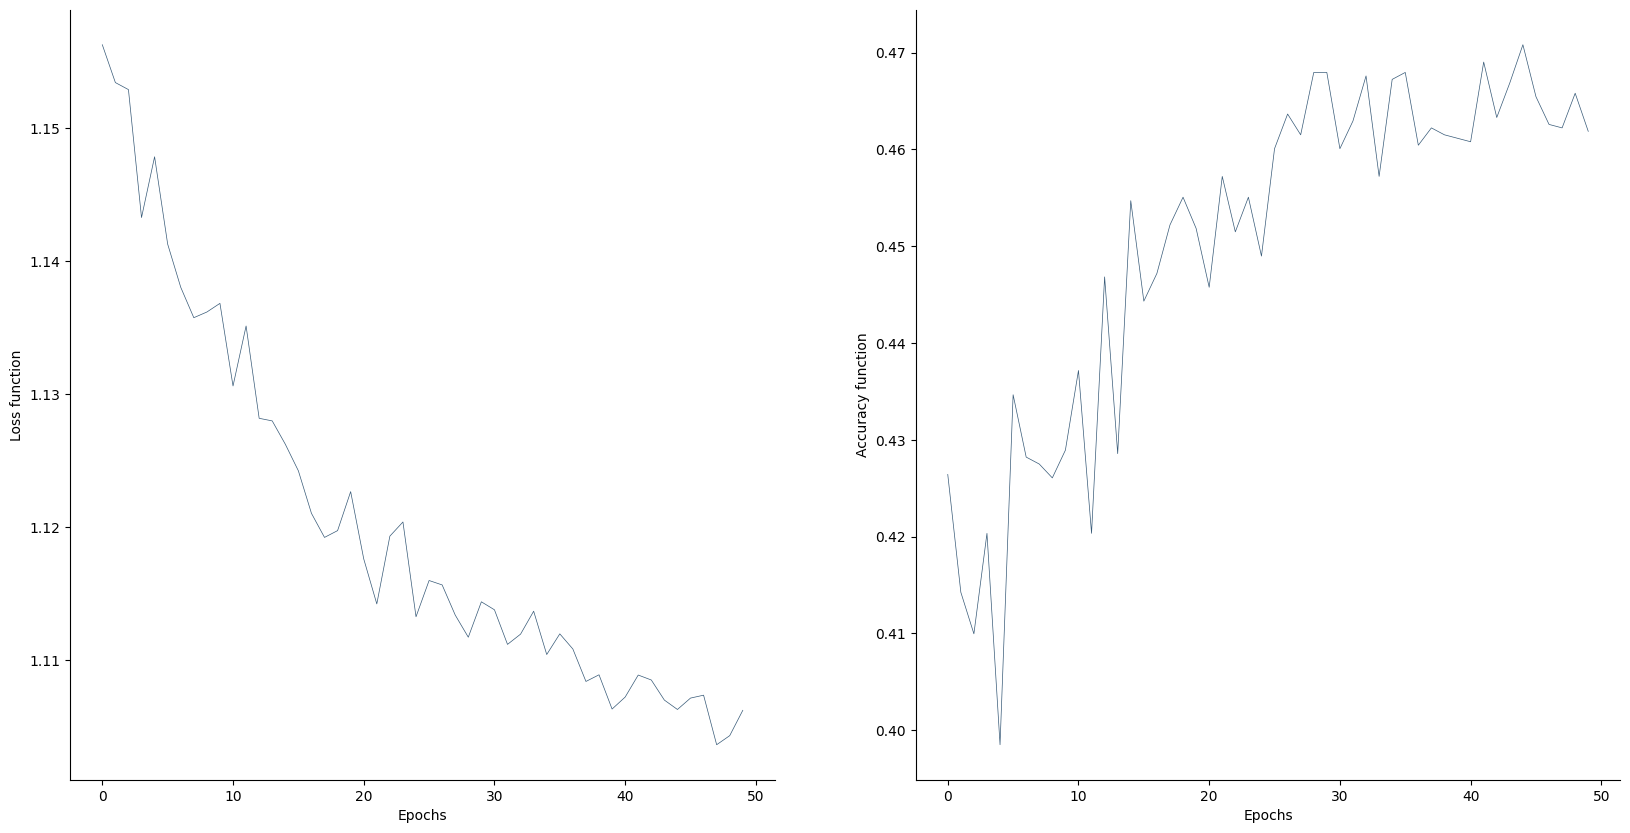

In [515]:
# %% View the training performance

fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.plot(model_history.history['loss'])
plt.xlabel('Epochs'), plt.ylabel('Loss function')
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'), plt.ylabel('Accuracy function')

In [519]:
import graphviz
import pydot
# %% Neural network weights
model_best.layers[0].get_weights()
# model.get_config() #model configuration
# %% View the model
plot_model(model_best)
# plot_model(model, to_file='../figures/P9_fig/model.png', show_shapes=True)
# %% Use the model
# Latest version
Y_prob = model.predict(X_test5)
Y_pred = np.argmax(Y_prob, axis=1)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
25/25 [==============================] - 0s 5ms/step


InvalidIndexError: (0, slice(None, None, None))

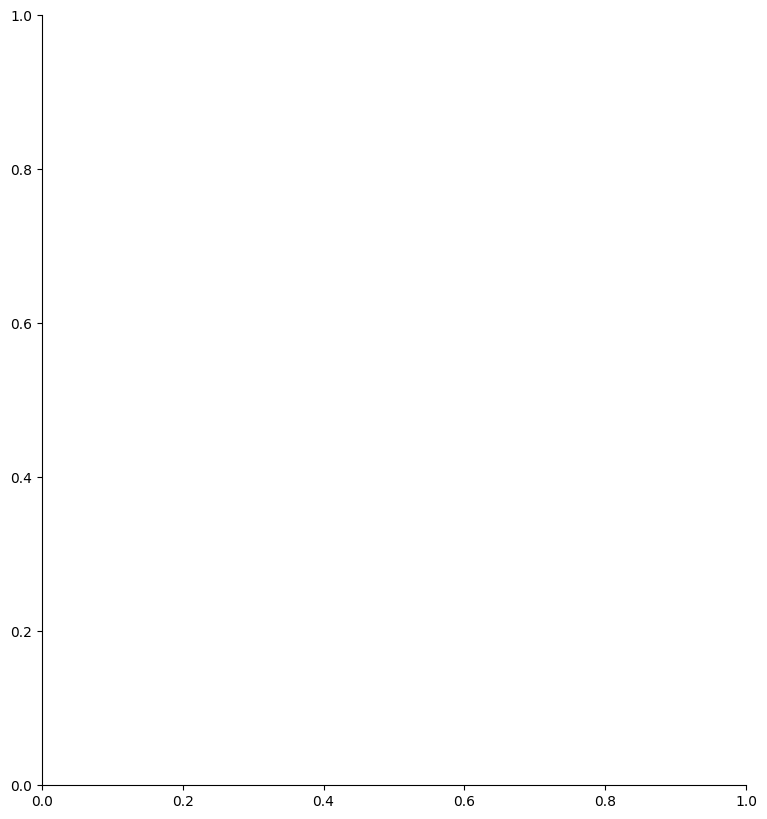

In [521]:
# %% View the neural network prediction
indx = 0
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(np.reshape(X_test4[indx, :], (8, 8)), cmap=plt.cm.gray_r)
plt.subplot(122)
plt.bar(np.arange(10), Y_prob[indx, :])
plt.ylim([0, 1])
plt.title('Prediction: %d' % np.argmax(Y_prob[indx, :]))

In [524]:
score = model_best.evaluate(X_test4, Y_test_dum, verbose=1)
print(score)

25/25 [==============================] - 0s 7ms/step - loss: 1.3785 - accuracy: 0.3321
[1.3784704208374023, 0.332080215215683]


In [542]:
# %% More metrics

Yhat_train = np.argmax(model.predict(X_train5), axis=1)
Yhat_test = np.argmax(model.predict(X_test5), axis=1)
accu_train = accuracy_score(y_train5, Yhat_train)
prec_train = precision_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
reca_train = recall_score(y_train5, Yhat_train, average='weighted',zero_division = 1)
accu_test = accuracy_score(y_test5, Yhat_test)
prec_test = precision_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
reca_test = recall_score(y_test5, Yhat_test, average='weighted',zero_division = 0)
print(' \t\t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f' % (accu_train,
                                                                                                            prec_train,
                                                                                                            reca_train,
                                                                                                            accu_test,
                                                                                                            prec_test,
                                                                                                            reca_test))

25/25 [==============================] - 0s 6ms/step
 		 Accu 	 Prec 	 Reca
 Train 	 0.000 	 1.000 	 0.000
  Test 	 0.008 	 0.046 	 0.008


In [549]:
results = {'Accuracy': [accuracy_martingala, accuracy_logistic, accuracy_naive, accuracy_forest],
           'Recall': [recall_martingala, recall_logistic, recall_naive, recall_forest],
           'Precision': [precision_martingala, precision_logistic, precision_naive, precision_forest],
           'F1': [f1_martingala, f1_logistic, f1_naive, f1_forest],
           'Balanced Accuracy': [balanced_martingala, balanced_logistic, balanced_naive, balanced_forest]
           }

table = pd.DataFrame(results, index=['Martingale', 'Logistic Regression', 'Naive Bayes', 'Random Forest'])
print(table)

                      Accuracy     Recall  Precision         F1  \
Martingale           31.328321  31.328321  31.331823  31.330068   
Logistic Regression  31.203008  32.581454  21.364127  25.806288   
Naive Bayes          27.067669  27.067669  28.127838  24.895935   
Random Forest        34.335840  34.335840  23.155341  26.611362   

                     Balanced Accuracy  
Martingale                   27.126044  
Logistic Regression          24.778388  
Naive Bayes                  25.770533  
Random Forest                26.565934  
